In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
from numpy import loadtxt
#Imports possibly useful software for Python
t=Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot')
#t=Table.read('TGAS_d125_Wright03_2Mass.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["X.Gmag."]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
SpType=t["SpType"]
#Defines SpectralType from the table
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array
Source=t["Source"]
#Defines Source from the table array
HipparcosIdentifier=t["HIP"]
#Defines HipparcosIdentifier from the HIP array

The columns within this catalog are: 
['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [3]:
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmag.mask[i]=False
         Jmagerror.mask[i]=False
    else:
         Jmag.mask[i]=True
         Jmagerror.mask[i]=True
         #SpType.mask[i]=True
#The first character of QFlags represents J. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][1]==ord("A")):
         Hmag.mask[i]=False
         Hmagerror.mask[i]=False
    else:
         Hmag.mask[i]=True
         Hmagerror.mask[i]=True
         #SpType.mask[i]=True
#The second character of QFlags represents H. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][2]==ord("A")):
         Kmag.mask[i]=False
         Kmagerror.mask[i]=False
    else:
         Kmag.mask[i]=True
         Kmagerror.mask[i]=True
         #SpType.mask[i]=True
#The third character of QFlags represents K. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).

In [4]:
Duplicates=t["Dup"]
#Defines Duplicates from the array of duplicates Dup in the table
DuplicateMask=0
for i in range(0,len(Duplicates)):
    if Duplicates[i]>0.5:
        DuplicateMask=DuplicateMask+1
        Row=t[i]
        Index=Row._index
        Columns=row._table.columns.values()
        for j in Columns:
            Columns.mask[i]=True
for k in range(0,len(Duplicates)):
    if Duplicates[k]>0.5:
        print(k,Duplicates[k])

In [5]:
Distance=1000./t["Plx"]
#Defines the distance to the stars
Jabsmag=Jmag+5-5*numpy.log10(Distance)
Habsmag=Hmag+5-5*numpy.log10(Distance)
Kabsmag=Kmag+5-5*numpy.log10(Distance)
Gabsmag=Gmag+5-5*numpy.log10(Distance)
Vabsmag=Vmag+5-5*numpy.log10(Distance)
Babsmag=Bmag+5-5*numpy.log10(Distance)

In [6]:
TranslatedLuminosityClass=[0.0]*len(SpType)
#Makes this an array of 0's with the same length as SpectralType
for i in range(0,len(SpType)):
    SpT=SpType[i].decode()
    if len(SpT)>2:
        for j in range(0,len(SpT)):
            if SpT[j]=='I':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+1
            if SpT[j]=='V':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+5
            if SpT[j]=='+':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
    else:
        TranslatedLuminosityClass[i]=5.1
    if TranslatedLuminosityClass[i]==6:
        TranslatedLuminosityClass[i]=4
    if TranslatedLuminosityClass[i]==11:
        TranslatedLuminosityClass[i]=4.5
    if TranslatedLuminosityClass[i]==9:
        TranslatedLuminosityClass[i]=3.5
    if TranslatedLuminosityClass[i]>5.2:
        TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
#Runs a loop that "translates" luminosity classes into Arabic numerals, 5.1 for no class, negative numbers for binaries or weird stars, or half-integer numbers for slash stars
BinariesOrUnknownClass=0
#Sets this number at 0
for k in range(0,len(SpType)):
    if TranslatedLuminosityClass[k]<0 or TranslatedLuminosityClass[k]>5:
        BinariesOrUnknownClass=BinariesOrUnknownClass+1
        #Adds 1 to number of binary/unknwon luminosity class stars for "translated" class less than 0 or greater than 5
SingleStarsWithKnownLuminosityClass=len(SpType)-BinariesOrUnknownClass
print('The number of single stars with known luminosity class is: ')
print(SingleStarsWithKnownLuminosityClass)
print('The number of binary stars or stars with unknown luminosity class is: ')
print(BinariesOrUnknownClass)
#Prints out the number of single stars with known luminosity class, and binary stars or stars without a luminosity class
print('The "translated" luminosity classes are: ')
print(TranslatedLuminosityClass)
#Prints out the vector of "translated" luminosity class numbers
#Luminosity classes get turned into number from 1 to 5
#Stars with no luminosity class have "translated" class 5.1
#Unknown spectral type stars and binary stars have negative "translated" class numbers
#Stars with "translated" class numbers halfway between numbers (i.e. 3.5, 4.5, etc.) had slashes (i.e. III/IV)

The number of single stars with known luminosity class is: 
27501
The number of binary stars or stars with unknown luminosity class is: 
22592
The "translated" luminosity classes are: 
[5.1, 5.1, 5.0, 5.1, 3.0, 5.1, 5.1, 5.1, 5.1, 5.0, 0.0, 5.1, 3.0, 5.1, 5.0, 5.1, 4, 5.1, 3.0, 3.5, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 4, 5.0, 3.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 4, 5.1, 5.0, 5.0, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 5.0, 3.0, 5.0, 3.5, 5.1, 4, -30.0, 5.0, 5.1, 5.0, 5.0, 4.5, 5.0, 5.1, 5.0, 5.1, 5.1, 4.5, 5.0, 5.0, 4, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 3.0, 5.0, 5.1, 4, 3.0, 5.0, 5.0, 0.0, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 4.5, 5.1, -25.0, 5.1, 5.1, 5.0, 3.5, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 0.0, 5.1, 5.1, 5.0, -30.0, 5.0, -27.0, 5.1, 5.1, 3.0, 5.1, 3.0, 5.0, 5.0, 0.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.

In [7]:
JEffWavelength=1254
HEffWavelength=1646
KEffWavelength=2149
GEffWavelength=600
VEffWavelength=527.2
BEffWavelength=436.1
EffWavelengths=[BEffWavelength,VEffWavelength,GEffWavelength,JEffWavelength,HEffWavelength,KEffWavelength]

In [8]:
Teff = t["Teff"]
#Defines effective temperature from the column in the table
MainSequenceJabsmag=[]
MainSequenceHabsmag=[]
MainSequenceKabsmag=[]
MainSequenceGabsmag=[]
MainSequenceVabsmag=[]
MainSequenceBabsmag=[]
MainSequenceTeff=[]
#Defines empty vectors for the magnitudes for stars with luminosity class V (5) (main sequence)
for i in range(0,len(TranslatedLuminosityClass)):
    if TranslatedLuminosityClass[i]==5:
        MainSequenceJabsmag.append(Jabsmag[i])
        MainSequenceHabsmag.append(Habsmag[i])
        MainSequenceKabsmag.append(Kabsmag[i])
        MainSequenceGabsmag.append(Gabsmag[i])
        MainSequenceVabsmag.append(Vabsmag[i])
        MainSequenceBabsmag.append(Babsmag[i])
        MainSequenceTeff.append(Teff[i])
#If the "translated" luminosity class number is 5 (main sequence), appends the corresponding magnitude to the main sequence magnitudes arrays
print('The number of main sequence stars is: ')
print(len(MainSequenceJabsmag))
#Prints the number of main sequence stars

The number of main sequence stars is: 
19960


*****Effective Temperature 3000-3500 K*****
The number of main sequence stars in the effective temperature range 3000-3500 K is:  1
The mean temperature in this effective temperature range is:  3470.0
The minimum effective temperature of a main sequence star in this range is:  3470
The maximum effective temperature of a main sequence star in this range is:  3470
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


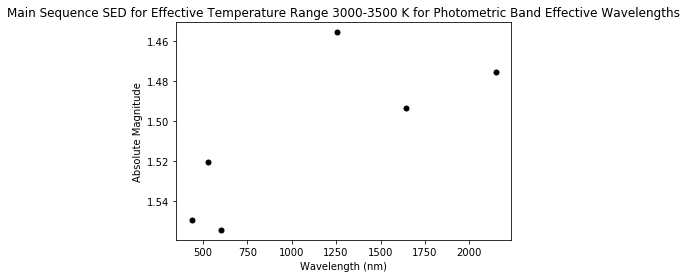

*****Effective Temperature 3500-4000 K*****
The number of main sequence stars in the effective temperature range 3500-4000 K is:  13
The mean temperature in this effective temperature range is:  3800.0
The minimum effective temperature of a main sequence star in this range is:  3580
The maximum effective temperature of a main sequence star in this range is:  4000
The standard deviation of the effective temperatures of main sequence stars in this range is:  114.219761189


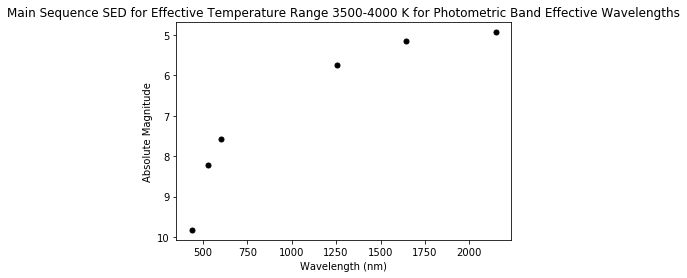

*****Effective Temperature 4000-4500 K*****
The number of main sequence stars in the effective temperature range 4000-4500 K is:  89
The mean temperature in this effective temperature range is:  4268.20224719
The minimum effective temperature of a main sequence star in this range is:  4000
The maximum effective temperature of a main sequence star in this range is:  4420
The standard deviation of the effective temperatures of main sequence stars in this range is:  143.092347001


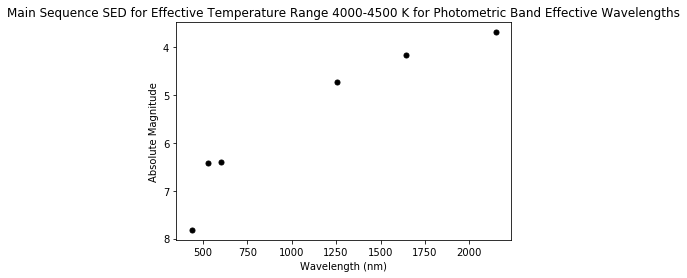

*****Effective Temperature 4500-5000 K*****
The number of main sequence stars in the effective temperature range 4500-5000 K is:  295
The mean temperature in this effective temperature range is:  4781.52542373
The minimum effective temperature of a main sequence star in this range is:  4590
The maximum effective temperature of a main sequence star in this range is:  4900
The standard deviation of the effective temperatures of main sequence stars in this range is:  113.770711422


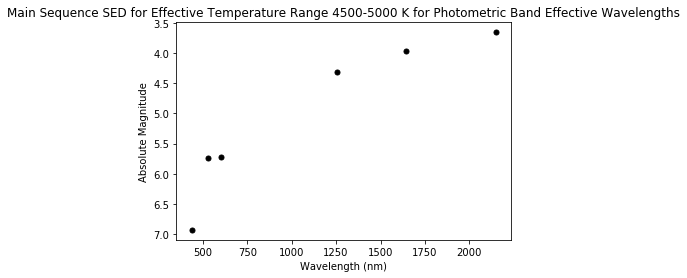

*****Effective Temperature 5000-5500 K*****
The number of main sequence stars in the effective temperature range 5000-5500 K is:  452
The mean temperature in this effective temperature range is:  5191.28318584
The minimum effective temperature of a main sequence star in this range is:  5080
The maximum effective temperature of a main sequence star in this range is:  5450
The standard deviation of the effective temperatures of main sequence stars in this range is:  81.8002065283


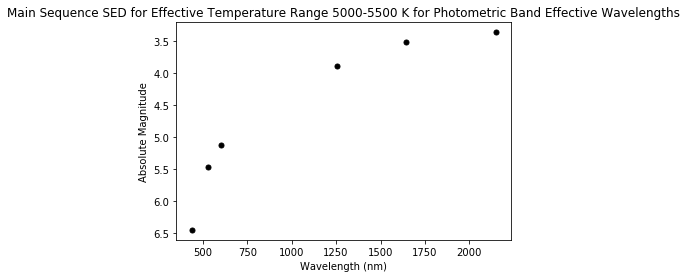

*****Effective Temperature 5500-6000 K*****
The number of main sequence stars in the effective temperature range 5500-6000 K is:  4522
The mean temperature in this effective temperature range is:  5788.25077399
The minimum effective temperature of a main sequence star in this range is:  5570
The maximum effective temperature of a main sequence star in this range is:  5860
The standard deviation of the effective temperatures of main sequence stars in this range is:  96.304406006


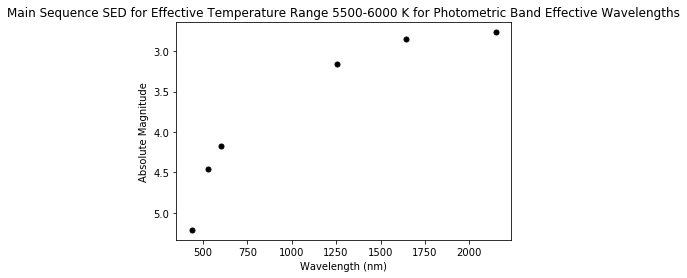

*****Effective Temperature 6000-6500 K*****
The number of main sequence stars in the effective temperature range 6000-6500 K is:  8401
The mean temperature in this effective temperature range is:  6316.11474824
The minimum effective temperature of a main sequence star in this range is:  6030
The maximum effective temperature of a main sequence star in this range is:  6470
The standard deviation of the effective temperatures of main sequence stars in this range is:  174.840272774


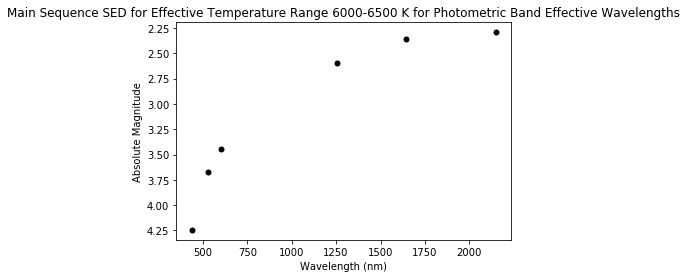

*****Effective Temperature 6500-7000 K*****
The number of main sequence stars in the effective temperature range 6500-7000 K is:  3059
The mean temperature in this effective temperature range is:  6889.92808107
The minimum effective temperature of a main sequence star in this range is:  6870
The maximum effective temperature of a main sequence star in this range is:  6890
The standard deviation of the effective temperatures of main sequence stars in this range is:  1.19716591286


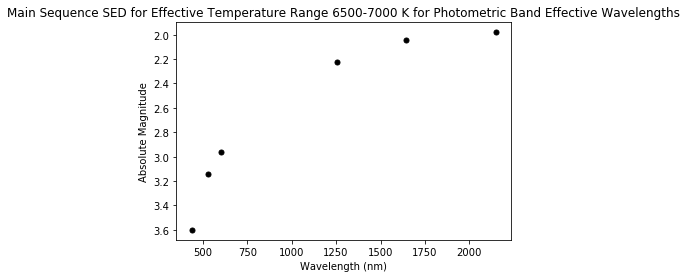

*****Effective Temperature 7000-7500 K*****
The number of main sequence stars in the effective temperature range 7000-7500 K is:  897
The mean temperature in this effective temperature range is:  7201.1148272
The minimum effective temperature of a main sequence star in this range is:  7150
The maximum effective temperature of a main sequence star in this range is:  7450
The standard deviation of the effective temperatures of main sequence stars in this range is:  19.0019999182


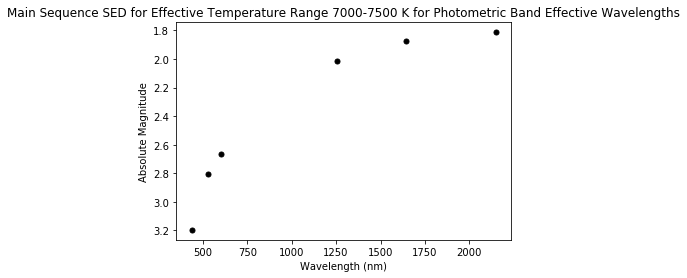

*****Effective Temperature 7500-8000 K*****
The number of main sequence stars in the effective temperature range 7500-8000 K is:  627
The mean temperature in this effective temperature range is:  7847.76714514
The minimum effective temperature of a main sequence star in this range is:  7650
The maximum effective temperature of a main sequence star in this range is:  7850
The standard deviation of the effective temperatures of main sequence stars in this range is:  21.0139318558


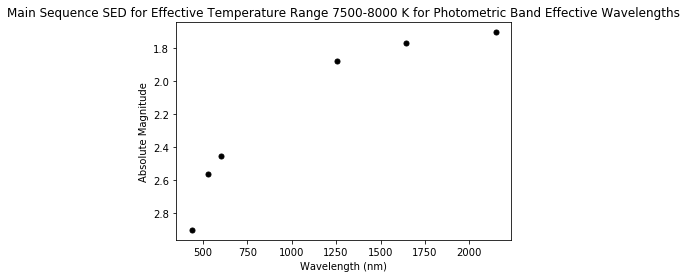

*****Effective Temperature 8000-8500 K*****
The number of main sequence stars in the effective temperature range 8000-8500 K is:  194
The mean temperature in this effective temperature range is:  8194.32989691
The minimum effective temperature of a main sequence star in this range is:  8100
The maximum effective temperature of a main sequence star in this range is:  8200
The standard deviation of the effective temperatures of main sequence stars in this range is:  23.1270456435


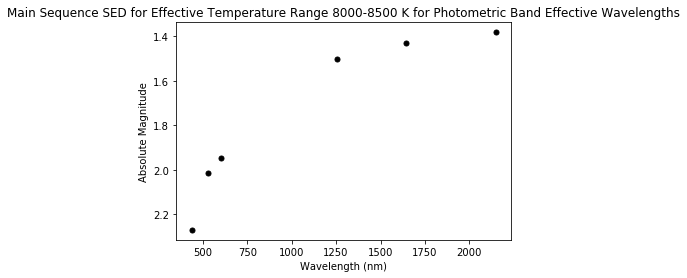

*****Effective Temperature 8500-9000 K*****
The number of main sequence stars in the effective temperature range 8500-9000 K is:  551
The mean temperature in this effective temperature range is:  8819.50998185
The minimum effective temperature of a main sequence star in this range is:  8600
The maximum effective temperature of a main sequence star in this range is:  9000
The standard deviation of the effective temperatures of main sequence stars in this range is:  128.63775794


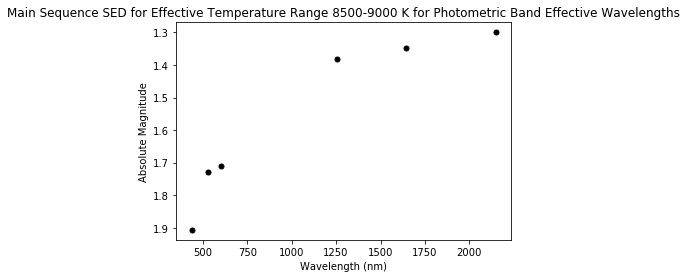

*****Effective Temperature 9000-9500 K*****
The number of main sequence stars in the effective temperature range 9000-9500 K is:  274
The mean temperature in this effective temperature range is:  9224.19708029
The minimum effective temperature of a main sequence star in this range is:  9000
The maximum effective temperature of a main sequence star in this range is:  9480
The standard deviation of the effective temperatures of main sequence stars in this range is:  41.7007657015


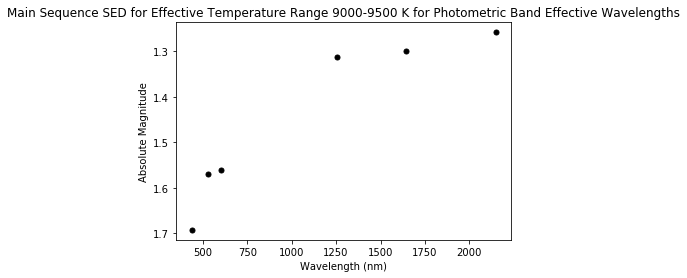

*****Effective Temperature 9500-10000 K*****
The number of main sequence stars in the effective temperature range 9500-10000 K is:  346
The mean temperature in this effective temperature range is:  9520.0
The minimum effective temperature of a main sequence star in this range is:  9520
The maximum effective temperature of a main sequence star in this range is:  9520
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


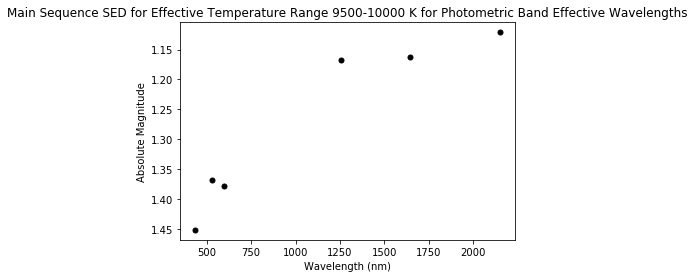

*****Effective Temperature 10000-10500 K*****
The number of main sequence stars in the effective temperature range 10000-10500 K is:  178
The mean temperature in this effective temperature range is:  10500.0
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  10500
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


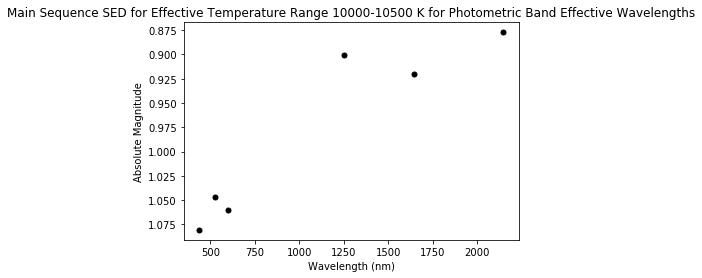

*****Effective Temperature 10500-11000 K*****
The number of main sequence stars in the effective temperature range 10500-11000 K is:  181
The mean temperature in this effective temperature range is:  10508.2872928
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  63.8354696591


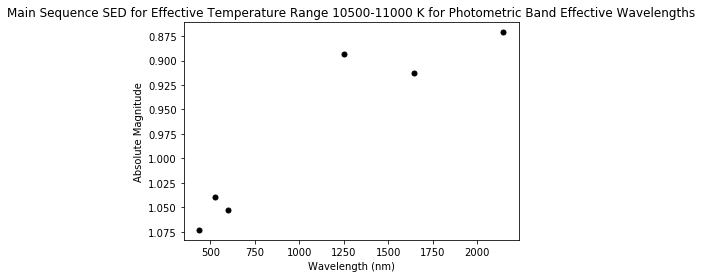

*****Effective Temperature 11000-11500 K*****
The number of main sequence stars in the effective temperature range 11000-11500 K is:  3
The mean temperature in this effective temperature range is:  11000.0
The minimum effective temperature of a main sequence star in this range is:  11000
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


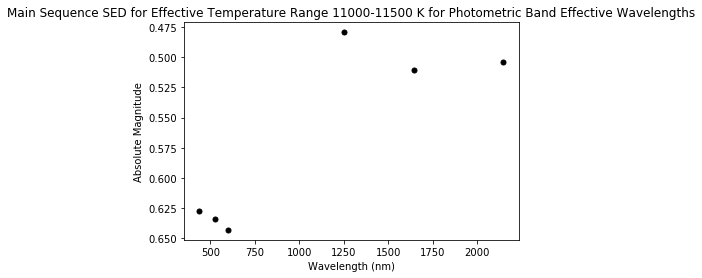

*****Effective Temperature 11500-12000 K*****
The number of main sequence stars in the effective temperature range 11500-12000 K is:  40
The mean temperature in this effective temperature range is:  11900.0
The minimum effective temperature of a main sequence star in this range is:  11900
The maximum effective temperature of a main sequence star in this range is:  11900
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


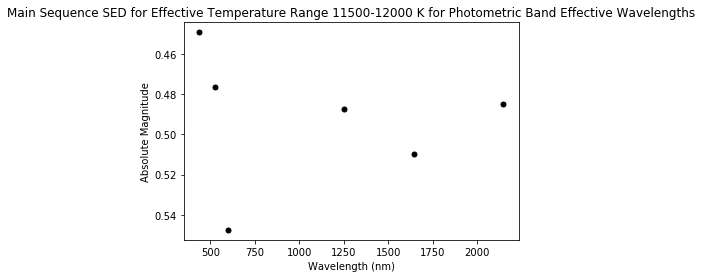

*****Effective Temperature 12000-12500 K*****
The number of main sequence stars in the effective temperature range 12000-12500 K is:  1
The mean temperature in this effective temperature range is:  12400.0
The minimum effective temperature of a main sequence star in this range is:  12400
The maximum effective temperature of a main sequence star in this range is:  12400
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


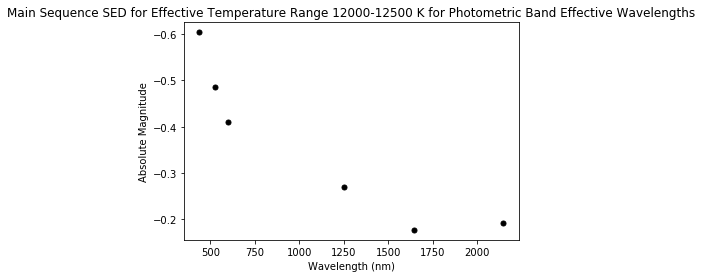

*****Effective Temperature 12500-13000 K*****
The number of main sequence stars in the effective temperature range 12500-13000 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


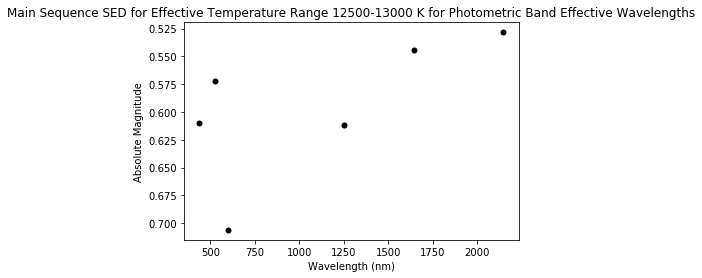

*****Effective Temperature 13000-13500 K*****
The number of main sequence stars in the effective temperature range 13000-13500 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


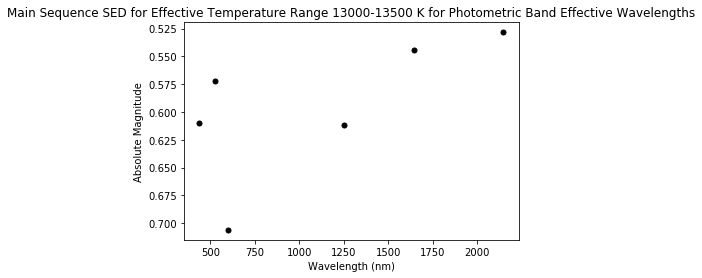

*****Effective Temperature 13500-14000 K*****
The number of main sequence stars in the effective temperature range 13500-14000 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


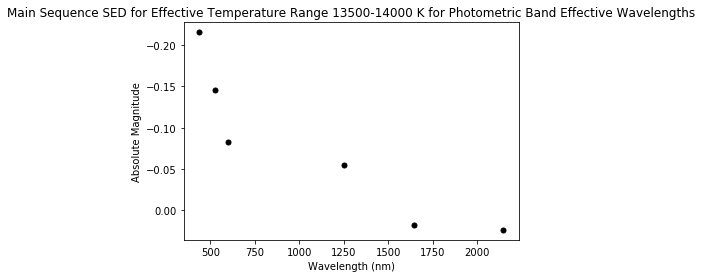

*****Effective Temperature 14000-14500 K*****
The number of main sequence stars in the effective temperature range 14000-14500 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


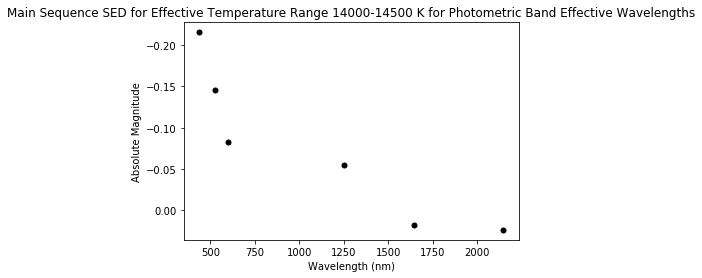

In [9]:
LowTemperatures=[3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
AbsFilterMagnitudesMatrix=numpy.zeros((len(LowTemperatures),6))
for i in LowTemperatures:
    print('*****Effective Temperature %g-%g K*****'%(i,i+500))
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    print('The number of main sequence stars in the effective temperature range %g-%g K is: '%(i,i+500),n)
    MeanTemperature=sum(Teffplt)/n
    print('The mean temperature in this effective temperature range is: ',MeanTemperature)
    AverageTemperatures.append(MeanTemperature)
    MinimumTemperature=min(Teffplt)
    print('The minimum effective temperature of a main sequence star in this range is: ',MinimumTemperature)
    MinimumTemperatures.append(MinimumTemperature)
    MaximumTemperature=max(Teffplt)
    print('The maximum effective temperature of a main sequence star in this range is: ',MaximumTemperature)
    MaximumTemperatures.append(MaximumTemperature)
    TemperatureStandardDeviation=numpy.std(TeffMask)
    print('The standard deviation of the effective temperatures of main sequence stars in this range is: ',TemperatureStandardDeviation)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)    
    JMask=numpy.ma.array(MainSequenceJabsmag,mask=TeffMask.mask)
    Jplt=numpy.ma.compressed(JMask)
    Jplt=Jplt[~numpy.isnan(Jplt)]
    MeanMainSequenceJplt=numpy.average(Jplt)
    HMask=numpy.ma.array(MainSequenceHabsmag,mask=TeffMask.mask)
    Hplt=numpy.ma.compressed(HMask)
    Hplt=Hplt[~numpy.isnan(Hplt)]
    MeanMainSequenceHplt=numpy.average(Hplt)
    KMask=numpy.ma.array(MainSequenceKabsmag,mask=TeffMask.mask)
    Kplt=numpy.ma.compressed(KMask)
    Kplt=Kplt[~numpy.isnan(Kplt)]
    MeanMainSequenceKplt=numpy.average(Kplt)
    GMask=numpy.ma.array(MainSequenceGabsmag,mask=TeffMask.mask)
    Gplt=numpy.ma.compressed(GMask)
    Gplt=Gplt[~numpy.isnan(Gplt)]
    MeanMainSequenceGplt=numpy.average(Gplt)
    VMask=numpy.ma.array(MainSequenceVabsmag,mask=TeffMask.mask)
    Vplt=numpy.ma.compressed(VMask)
    Vplt=Vplt[~numpy.isnan(Vplt)]
    MeanMainSequenceVplt=numpy.average(Vplt)
    BMask=numpy.ma.array(MainSequenceBabsmag,mask=TeffMask.mask)
    Bplt=numpy.ma.compressed(BMask)
    Bplt=Bplt[~numpy.isnan(Bplt)]
    MeanMainSequenceBplt=numpy.average(Bplt)
    FilterAbsMag=[MeanMainSequenceBplt,MeanMainSequenceVplt,MeanMainSequenceGplt,MeanMainSequenceJplt,MeanMainSequenceHplt,MeanMainSequenceKplt] 
    RowNumber=(i-3000)/500
    j=int(RowNumber)
    AbsFilterMagnitudesMatrix[j, : ]=FilterAbsMag
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute Magnitude')
    plt.title('Main Sequence SED for Effective Temperature Range %g-%g K for Photometric Band Effective Wavelengths'%(i,i+500))
    plt.plot(EffWavelengths,FilterAbsMag,'ko',ms=5)
    plt.gca().invert_yaxis()
    plt.show()

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Warning: converting a masked element to nan.


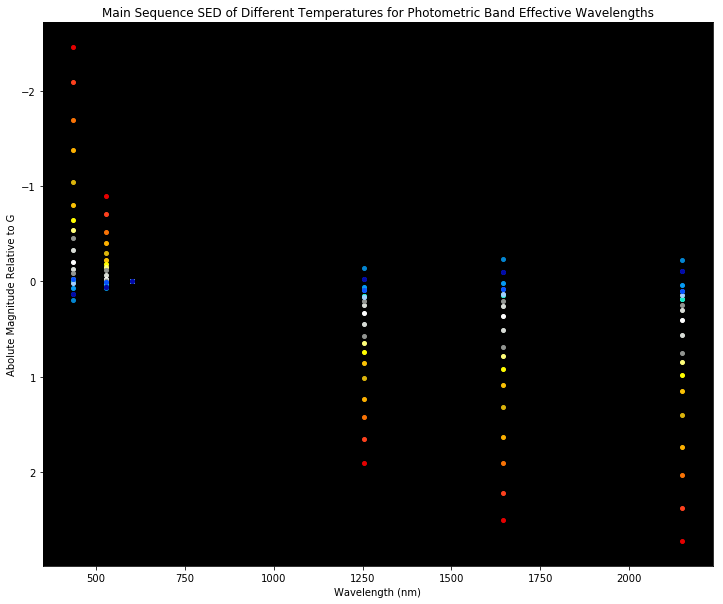

In [10]:
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=sum(Teffplt)/n
    MainSequenceG_Jabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceJabsmag)
    G_JMask=numpy.ma.array(MainSequenceG_Jabsmag,mask=TeffMask.mask)
    G_Jplt=numpy.ma.compressed(G_JMask)
    G_Jplt=G_Jplt[~numpy.isnan(G_Jplt)]
    MeanMainSequenceG_Jplt=numpy.average(G_Jplt)
    MainSequenceG_Habsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceHabsmag)
    G_HMask=numpy.ma.array(MainSequenceG_Habsmag,mask=TeffMask.mask)
    G_Hplt=numpy.ma.compressed(G_HMask)
    G_Hplt=G_Hplt[~numpy.isnan(G_Hplt)]
    MeanMainSequenceG_Hplt=numpy.average(G_Hplt)
    MainSequenceG_Kabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceKabsmag)
    G_KMask=numpy.ma.array(MainSequenceG_Kabsmag,mask=TeffMask.mask)
    G_Kplt=numpy.ma.compressed(G_KMask)
    G_Kplt=G_Kplt[~numpy.isnan(G_Kplt)]
    MeanMainSequenceG_Kplt=numpy.average(G_Kplt)
    MainSequenceG_Gabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceGabsmag)
    G_GMask=numpy.ma.array(MainSequenceG_Gabsmag,mask=TeffMask.mask)
    G_Gplt=numpy.ma.compressed(G_GMask)
    G_Gplt=G_Gplt[~numpy.isnan(G_Gplt)]
    MeanMainSequenceG_Gplt=numpy.average(G_Gplt)
    MainSequenceG_Vabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceVabsmag)
    G_VMask=numpy.ma.array(MainSequenceG_Vabsmag,mask=TeffMask.mask)
    G_Vplt=numpy.ma.compressed(G_VMask)
    G_Vplt=G_Vplt[~numpy.isnan(G_Vplt)]
    MeanMainSequenceG_Vplt=numpy.average(G_Vplt)
    MainSequenceG_Babsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceBabsmag)
    G_BMask=numpy.ma.array(MainSequenceG_Babsmag,mask=TeffMask.mask)
    G_Bplt=numpy.ma.compressed(G_BMask)
    G_Bplt=G_Bplt[~numpy.isnan(G_Bplt)]
    MeanMainSequenceG_Bplt=numpy.average(G_Bplt)
    GSubtractionAbsMag=[MeanMainSequenceG_Bplt,MeanMainSequenceG_Vplt,MeanMainSequenceG_Gplt,MeanMainSequenceG_Jplt,MeanMainSequenceG_Hplt,MeanMainSequenceG_Kplt]
    plt.rcParams['axes.facecolor']='black'
    plt.rcParams['figure.figsize']=12,10
    #if i==3000:
        #plt.plot(EffWavelengths,FilterAbsMag,'xkcd:blood',ms=5)    
    if i==3500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:red',linestyle='None',marker='.',markersize=8)
    elif i==4000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:orange red',linestyle='None',marker='.',markersize=8)
    elif i==4500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:orange',linestyle='None',marker='.',markersize=8)
    elif i==5000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:yellow orange',linestyle='None',marker='.',markersize=8)
    elif i==5500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:gold',linestyle='None',marker='.',markersize=8)
    elif i==6000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:goldenrod',linestyle='None',marker='.',markersize=8)
    elif i==6500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:bright yellow',linestyle='None',marker='.',markersize=8)
    elif i==7000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light yellow',linestyle='None',marker='.',markersize=8)
    elif i==7500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:grey',linestyle='None',marker='.',markersize=8)
    elif i==8000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light grey',linestyle='None',marker='.',markersize=8)
    elif i==8500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:white',linestyle='None',marker='.',markersize=8)
    elif i==9000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light grey',linestyle='None',marker='.',markersize=8)
    elif i==9500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:grey',linestyle='None',marker='.',markersize=8)
    elif i==10000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:pale cyan',linestyle='None',marker='.',markersize=8)
    elif i==10500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:aqua',linestyle='None',marker='.',markersize=8)
    elif i==11000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:baby blue',linestyle='None',marker='.',markersize=8)
    elif i==11500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:azure',linestyle='None',marker='.',markersize=8)
    elif i==12000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:cerulean',linestyle='None',marker='.',markersize=8)
    elif i==12500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:dusty blue',linestyle='None',marker='.',markersize=8)
    elif i==13000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:electric blue',linestyle='None',marker='.',markersize=8)
    elif i==13500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:blue',linestyle='None',marker='.',markersize=8)
    elif i==14000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:cobalt blue',linestyle='None',marker='.',markersize=8)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Abolute Magnitude Relative to G')
plt.title('Main Sequence SED of Different Temperatures for Photometric Band Effective Wavelengths')
plt.gca().invert_yaxis()
plt.show()

In [11]:
Uncertainty=0.1
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
BmV=numpy.subtract(MainSequenceBabsmag,MainSequenceVabsmag)
BmG=numpy.subtract(MainSequenceBabsmag,MainSequenceGabsmag)
VmG=numpy.subtract(MainSequenceVabsmag,MainSequenceGabsmag)
JmG=numpy.subtract(MainSequenceJabsmag,MainSequenceGabsmag)
HmG=numpy.subtract(MainSequenceHabsmag,MainSequenceGabsmag)
KmG=numpy.subtract(MainSequenceKabsmag,MainSequenceGabsmag)
Tsed=numpy.zeros((len(LowTemperatures),5))
Tsed_std=numpy.zeros((len(LowTemperatures),5))
Tsed_cnt=numpy.zeros((len(LowTemperatures),5))
Temp_SED=numpy.zeros(len(LowTemperatures))
for i in range(0,len(LowTemperatures)):
    Low=LowTemperatures[i]
    High=Low+500
    Temp_SED[i]=(Low+High)/2
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,Low,High)
    BmGMask=numpy.ma.array(BmG,mask=TeffMask.mask)
    Tsed[i,0]=numpy.nanmean(BmGMask)
    Tsed_std[i,0]=numpy.nanstd(BmGMask)
    Tsed_cnt[i,0]=TeffMask.count()
    VmGMask=numpy.ma.array(VmG,mask=TeffMask.mask)
    Tsed[i,1]=numpy.nanmean(VmGMask)
    Tsed_std[i,1]=numpy.nanstd(VmGMask)
    Tsed_cnt[i,1]=TeffMask.count()
    JmGMask=numpy.ma.array(JmG,mask=TeffMask.mask)
    Tsed[i,2]=numpy.nanmean(JmGMask)
    Tsed_std[i,2]=numpy.nanstd(JmGMask)
    Tsed_cnt[i,2]=TeffMask.count()
    HmGMask=numpy.ma.array(HmG,mask=TeffMask.mask)
    Tsed[i,3]=numpy.nanmean(HmGMask)
    Tsed_std[i,3]=numpy.nanstd(HmGMask)
    Tsed_cnt[i,3]=TeffMask.count()
    KmGMask=numpy.ma.array(KmG,mask=TeffMask.mask)
    Tsed[i,4]=numpy.nanmean(KmGMask)
    Tsed_std[i,4]=numpy.nanstd(KmGMask)
    Tsed_cnt[i,4]=TeffMask.count()
count=0
TemplateIndex=numpy.array([])
TemplateTinf=numpy.array([])
TemplateTeff=numpy.array([])
Test_SED=numpy.ma.masked_array([0.0]*5,mask=False)
print('The following template matching data is organized in the following manner: ')
print('Star Number     Minimized Chi Squared     Inferred Template Temperature     Catalog Listed Effective Temperature')
for i in range(0,len(Source)):
    if Jmag.mask[i]==False:
        if Hmag.mask[i]==False:
            if Kmag.mask[i]==False:
                if TranslatedLuminosityClass[i]>4.9 and TranslatedLuminosityClass[i]<5.05:
                    ChiSquared=numpy.zeros(len(Temp_SED))
                    Test_SED[0]=numpy.ma.masked_array(Babsmag[i]-Gabsmag[i])
                    Test_SED[1]=numpy.ma.masked_array(Vabsmag[i]-Gabsmag[i])
                    Test_SED[2]=numpy.ma.masked_array(Jabsmag[i]-Gabsmag[i])
                    Test_SED[3]=numpy.ma.masked_array(Habsmag[i]-Gabsmag[i])
                    Test_SED[4]=numpy.ma.masked_array(Kabsmag[i]-Gabsmag[i])
                    for j in range(0,len(Temp_SED)):
                        Template=Tsed[j, : ]
                        for k in range(0,4):
                            if Test_SED.mask[k]==False:
                                ChiSquared[j]=ChiSquared[j]+(((Test_SED[k]-Template[k])*(Test_SED[k]-Template[k]))/(0.1*0.1*5))
                    ChiSquared=numpy.asarray(ChiSquared)
                    MinimumChiSquaredIndex=numpy.where(ChiSquared==numpy.nanmin(ChiSquared))
                    y=MinimumChiSquaredIndex[0]
                    z=y[0]
                    TemplateTinf=numpy.append(TemplateTinf,Temp_SED[z])
                    TemplateTeff=numpy.append(TemplateTeff,Teff[i])
                    print(i,ChiSquared[z],TemplateTinf[count],Teff[i])
                    TemplateIndex=numpy.append(TemplateIndex,i)
                    count=count+1
print('There are ',count,' main sequence stars which have been matched with the closest template.')
print('Inferred main sequence stellar temperatures from template matching: ')
print(TemplateTinf)
print('Listed main sequence effective stellar temperatures: ')
print(TemplateTeff)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Warning: converting a masked element to nan.
  This is separate from the ipykernel package so we can avoid doing imports until
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Warning: converting a masked element to nan.
  after removing the cwd from sys.path.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Warning: converting a masked element to nan.
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Warning: converting a masked element to nan

The following template matching data is organized in the following manner: 
Star Number     Minimized Chi Squared     Inferred Template Temperature     Catalog Listed Effective Temperature
2 0.0542752767593 9750.0 9520
9 0.0247367014531 6250.0 6440
14 0.514778101841 7250.0 6890
20 0.521416429651 5250.0 5250
23 0.259000662384 5750.0 6440
26 0.243863188523 6250.0 6440
28 0.291348250946 6250.0 5860
29 0.408036133597 6250.0 6440
30 0.0365630532018 7250.0 6890
31 0.0511706682282 9750.0 9230
33 0.391742575958 6750.0 6440
37 0.0183646309193 9250.0 8970
39 0.337208287978 6250.0 6440
41 0.0922100063444 12750.0 9520
43 0.36355963082 5750.0 5770
44 0.642550255474 6250.0 5860
49 0.126360613771 5750.0 5770
50 0.0192964029742 10250.0 9230
51 0.22189468241 6750.0 6890
54 0.0683011792229 7250.0 6890
55 0.0834184982081 6750.0 6890
57 0.390291731708 5750.0 5770
58 0.805555663519 6250.0 5860
61 0.0604907024464 6750.0 6890
63 0.437676109986 5750.0 5860
68 0.0813346959502 6750.0 6890
70 0.352902279578 6750

643 0.228960228735 6250.0 6200
644 0.0587575956572 5750.0 6030
645 0.108905297928 7250.0 6870
650 0.458483217413 6250.0 7200
653 0.169410122658 6250.0 6440
655 0.109594903565 6250.0 6440
658 0.0331325856887 10250.0 9520
659 0.207379506751 5250.0 5080
660 0.266314083999 6250.0 6440
663 0.557407623213 5750.0 5770
665 0.519771679517 5750.0 6030
669 0.0820824020233 6250.0 6030
674 0.680993633689 6250.0 6030
676 0.30555088393 6250.0 6440
678 0.405215808473 6250.0 6030
679 0.120253628287 7250.0 6890
680 0.033330189096 5750.0 5860
695 0.617920989683 5750.0 5860
697 0.0661158461049 11750.0 10500
699 0.275672140727 5750.0 6030
700 0.795884140524 5750.0 6440
701 0.128562886165 6750.0 6890
702 0.732315448221 5250.0 5250
703 0.105824581332 6250.0 6200
705 0.196018237821 6250.0 6030
707 0.375466154204 6250.0 6440
710 0.0350212263891 5750.0 5860
711 0.617494025918 6250.0 6440
712 0.188992663286 6750.0 6440
713 0.0937407388954 6250.0 6440
718 0.056393341314 6250.0 5860
720 0.102941707138 7750.0 6890


1673 0.165733324053 6250.0 6440
1675 0.212629370535 6250.0 6200
1676 0.484719673619 5750.0 5770
1677 0.0563010424957 6750.0 6890
1682 0.387953822028 4750.0 4900
1683 0.327077928466 6250.0 6440
1684 0.21544691253 6750.0 6890
1685 4.62217206973 5750.0 6440
1689 0.596398361675 5250.0 5080
1693 0.311859197625 6750.0 6440
1694 0.062250987179 6250.0 6440
1697 0.0636311710268 6750.0 6890
1700 0.0551412417654 6250.0 6440
1701 0.118931094017 7750.0 6890
1702 0.193054647636 5750.0 5860
1703 0.0393009110683 6250.0 6030
1705 0.463811134175 5750.0 5860
1706 0.0774551624217 6250.0 6440
1707 0.0999777076063 7250.0 7200
1709 0.00274241618147 6250.0 6440
1711 0.169749736352 6750.0 6890
1714 0.0110001696712 6250.0 6440
1717 0.0636780882041 7250.0 6890
1718 0.568840581813 5750.0 5860
1719 0.163780312797 5750.0 6440
1721 0.0478459303922 6750.0 6890
1724 0.12714490477 6250.0 6030
1725 0.174127211016 7250.0 6890
1728 0.690166495069 6250.0 6440
1731 0.258671420648 6250.0 6440
1734 0.29073785739 6250.0 6440
1

2353 0.625531735715 5750.0 6030
2354 0.0893740656695 8250.0 8200
2356 0.082591757649 6750.0 6890
2357 0.15174149984 6250.0 6440
2359 0.314877242912 5750.0 5860
2363 0.365777391589 6250.0 6890
2364 0.111217314697 5750.0 5770
2365 0.34847714215 6750.0 6440
2371 0.316055471436 7750.0 9000
2372 0.215521250655 6250.0 6890
2377 0.105068447576 6750.0 7200
2379 0.109323300186 6250.0 6200
2383 0.166062702632 5750.0 6440
2385 0.11613991308 6750.0 6440
2386 0.0193018707589 6250.0 6440
2388 0.0553600496164 6250.0 6440
2390 0.09537680445 5750.0 6440
2396 0.565525999703 6250.0 6440
2397 0.733231582519 5750.0 5770
2401 0.107140038549 5750.0 6030
2409 0.0557367428474 7250.0 7200
2410 0.497158924524 6250.0 5860
2412 0.569806878596 6250.0 5860
2413 0.259836652621 6750.0 6440
2415 0.693665875366 6250.0 6440
2420 0.42363454138 6250.0 6030
2423 0.0857319887609 7750.0 7850
2427 0.392775612725 5750.0 5860
2428 0.500015497692 5750.0 6200
2430 0.758432895745 5250.0 5250
2431 0.263603309922 5750.0 6200
2434 0.0

3131 0.145129120501 6250.0 6440
3133 0.679209943017 5750.0 5570
3135 0.227178016557 6250.0 6030
3137 0.0764052810842 5750.0 5860
3140 0.133073662339 6250.0 6440
3141 0.746718896456 5750.0 5860
3143 0.0753485246284 6750.0 6890
3146 0.129512733052 7250.0 6890
3147 0.0904197201979 7250.0 7200
3150 0.336728090199 5750.0 5860
3151 0.198038914329 5750.0 6030
3152 0.230337076405 5750.0 5860
3155 0.253523842098 6250.0 6030
3157 0.570841819993 5750.0 6030
3158 0.659419198519 6250.0 5860
3159 0.443205345053 6250.0 6200
3164 0.350938645796 5750.0 5570
3165 0.0294487382932 8750.0 8970
3170 0.0297282552707 6750.0 6890
3171 0.00545541593447 6750.0 6440
3174 0.558315925361 6250.0 6890
3176 0.249998008252 6250.0 6440
3182 0.102177116071 6250.0 6200
3184 0.0441877803694 6750.0 6890
3186 0.324004362105 6250.0 6440
3189 0.00579162833681 6750.0 6890
3190 0.495055697446 6250.0 5860
3192 0.201204430943 6250.0 6440
3194 0.475175611775 5250.0 5250
3195 1.0842922393 5750.0 5860
3196 0.0108233468118 6250.0 6440

3942 0.324585394879 6250.0 6030
3944 0.385951228173 6250.0 6030
3948 0.0520276649511 6250.0 6030
3950 0.0363795689672 12750.0 10500
3951 0.0944028809032 7750.0 7850
3952 0.377244626053 6250.0 6440
3953 0.531452741748 6250.0 5860
3955 0.374725685081 5750.0 5860
3956 0.0638406517299 6750.0 6440
3957 0.751385214347 5750.0 6030
3958 0.00991299745533 7250.0 6890
3959 0.090565849116 6750.0 6440
3960 0.254409647843 8250.0 7200
3961 0.092101647412 6250.0 6440
3962 0.0776095240909 6750.0 6890
3963 0.0314312038121 6750.0 6440
3965 0.719056412157 5750.0 5770
3966 0.0145716769107 6750.0 7200
3967 0.0550976818946 6750.0 6890
3968 0.278318351499 6750.0 6440
3969 0.159911959667 6250.0 6030
3971 0.16555493572 6750.0 6440
3972 0.560847413239 5750.0 5770
3975 0.242494228977 5750.0 5860
3976 0.157682887817 5750.0 5860
3977 0.641670290841 5750.0 6030
3978 0.0455829488634 6750.0 6440
3982 0.702436632266 5750.0 5860
3985 0.11120279005 5750.0 5860
3987 0.0233116581572 5750.0 5860
3990 0.754165374929 6250.0 5

4809 0.154250261373 7250.0 6890
4814 0.746893133005 6250.0 6030
4815 0.191510133706 5750.0 5770
4816 0.623998299005 7250.0 10500
4819 0.0515562142703 7250.0 6890
4820 0.910244946513 4750.0 4900
4821 0.341752864822 6250.0 6440
4822 0.0705369466931 7750.0 7200
4824 0.0367104906303 6250.0 6030
4828 1.41920770138 5750.0 5860
4830 0.728230384834 5750.0 5860
4833 0.0211519373152 6250.0 6440
4834 0.0430813230288 6750.0 6440
4835 0.106221570684 6750.0 6440
4837 0.155896890615 6750.0 6440
4839 0.0725525672874 5750.0 5770
4842 0.045031276071 6750.0 7200
4843 0.303424967459 6750.0 6440
4844 1.09477301417 5750.0 5570
4846 0.969780712173 8250.0 8970
4848 0.0234368118782 6750.0 6440
4849 0.883411877864 5750.0 5570
4850 0.855792179238 5750.0 5860
4851 0.0285792948878 6250.0 6440
4852 0.348037014446 5750.0 6890
4855 0.0880210542106 6250.0 6030
4857 0.346556056897 5750.0 5770
4862 0.759779257954 4750.0 5080
4863 0.918988372511 5750.0 5570
4866 0.0337102432687 7250.0 6890
4869 0.242097122836 6250.0 6440

5919 3.97278748856 5750.0 6440
5923 0.055688103887 6750.0 6890
5924 0.171215840171 7750.0 6890
5926 0.0626350318962 7250.0 6890
5927 0.0266466115502 6750.0 6440
5936 0.384620477916 5750.0 5860
5937 0.53990805736 6250.0 6030
5938 0.752341753895 5250.0 5770
5948 0.0764369405894 9750.0 9230
5952 0.492751563807 5750.0 5860
5954 0.114436151662 6750.0 6440
5957 0.271751372983 5750.0 5770
5958 0.167695575826 6750.0 6890
5959 0.0100493272046 6250.0 6440
5961 0.0726114181198 5250.0 5250
5974 2.34512349625 4250.0 4900
5976 0.165356466084 6750.0 6890
5979 0.0418523883815 11750.0 9520
5981 1.38362649706 8750.0 8970
5982 0.203689725461 4750.0 4730
5984 0.195048686607 6250.0 6440
5988 3.1661519986 6250.0 6440
5990 0.373051761126 5750.0 5860
5991 0.0109009296793 5250.0 5250
5996 0.148234553499 5750.0 5860
5998 0.172583695665 7250.0 7850
6003 0.0113862029058 6750.0 6890
6010 0.638098112692 5750.0 5860
6013 0.0362861051001 6250.0 6030
6016 0.339347361005 6250.0 6200
6017 0.116623598287 5750.0 5860
6018

6961 0.0102075845679 6250.0 6030
6962 0.303826259603 8750.0 8200
6963 0.110089070146 6750.0 6890
6967 0.0689111151291 6250.0 6440
6969 0.399123131245 8750.0 9520
6972 0.0855734856167 7750.0 6890
6975 0.0264826209055 6250.0 6440
6976 0.270125832108 6750.0 6440
6978 0.604455909687 5750.0 5860
6981 0.00553812241841 7750.0 7200
6982 0.125137486664 6750.0 6890
6984 0.631682727078 4750.0 5770
6986 0.150080593912 6750.0 6440
6988 0.152736474224 4250.0 4590
6990 0.870271020445 5250.0 5570
6991 0.348306385069 6750.0 6440
6999 0.513603845487 6250.0 6200
7000 1.70917731941 5250.0 5570
7003 0.154492805649 6750.0 6440
7005 0.281580860916 6750.0 6440
7007 0.0435262755698 6250.0 6030
7009 0.0864981934797 6250.0 6200
7011 0.885530837943 4250.0 4730
7012 0.106803783231 6750.0 6890
7013 0.208463930412 7250.0 7200
7015 0.262525471535 6250.0 6440
7018 0.0354184823615 6750.0 6440
7019 0.0807651158955 7750.0 7200
7020 0.0831503559443 5750.0 5770
7021 0.103650503568 6750.0 6890
7023 1.06284512413 5250.0 5570

7753 0.011396062438 7250.0 7200
7756 1.49440816803 5750.0 5770
7757 0.113703899971 8250.0 7850
7759 0.204129107843 6250.0 6440
7764 0.114279361382 5750.0 5860
7772 0.340632893124 6250.0 6440
7774 0.34631656468 5750.0 5770
7777 0.260853008538 5250.0 5570
7782 0.139685031208 7250.0 6890
7784 0.0915742876147 6250.0 6440
7787 0.068161436623 6750.0 6890
7788 0.132632124866 5750.0 5860
7791 0.649796323637 6250.0 6030
7793 0.117027447321 6250.0 6440
7796 0.19826795525 6250.0 6030
7804 0.169175772966 6250.0 6890
7806 0.301884039102 5250.0 5570
7808 0.0790947960507 5750.0 5770
7810 0.0595268338085 5750.0 5860
7813 0.554143426989 6250.0 6890
7814 0.0665498107702 6250.0 6200
7815 0.141804910641 6750.0 6890
7816 0.311138119352 6250.0 5860
7818 0.101932234974 5750.0 5770
7819 0.675445305362 5750.0 5860
7822 0.0723730444211 9250.0 9230
7823 0.476005058252 5750.0 5860
7825 0.416105923967 6750.0 6440
7826 0.799101358819 5250.0 5570
7827 0.053804248725 6250.0 6200
7829 0.070210206293 6250.0 6440
7832 0

8545 0.721766414255 6250.0 6030
8546 0.359013291872 6750.0 6890
8549 0.22814790795 6250.0 6030
8550 0.0110414169441 7250.0 6890
8551 0.698779370411 5750.0 5860
8552 0.118254636525 6250.0 6200
8553 0.635081936776 5750.0 6030
8556 0.308665625637 6750.0 6890
8557 0.249651813532 7750.0 7200
8558 0.685334824274 5750.0 6030
8559 0.141993877986 5750.0 5770
8560 0.0198595148154 8750.0 8720
8562 0.2997550361 6750.0 6890
8563 0.272484417214 6250.0 6440
8564 0.0187020348162 9250.0 9230
8565 0.475374833613 5750.0 5860
8568 0.253234800547 5750.0 5860
8572 0.253852742338 6250.0 6440
8573 0.403169326662 6250.0 6030
8577 0.123497629917 8250.0 8200
8579 1.03445843706 6250.0 6030
8580 0.316700937956 5750.0 5860
8581 0.20710921114 6750.0 6440
8585 0.0949800517515 5750.0 5770
8590 0.170628658167 6250.0 6030
8592 0.577253801702 6250.0 6200
8593 0.012009382696 7250.0 7200
8594 0.147909547719 7250.0 6440
8595 0.0574736553246 6750.0 6440
8596 0.558293390451 5750.0 5770
8598 0.048931449519 6250.0 6440
8600 0.0

9291 0.238224915205 6750.0 6440
9293 0.246984683554 6750.0 6440
9296 0.0713467641879 6250.0 6890
9299 0.347173082161 6750.0 6440
9300 0.12995577761 6250.0 6440
9303 0.353303722275 8250.0 7850
9304 0.01776255807 8750.0 8720
9307 0.108569013454 8750.0 8970
9308 0.526800739276 6250.0 5860
9311 0.0328549454469 8250.0 9230
9314 0.140457397381 7250.0 6890
9317 0.0895570246348 8750.0 8720
9321 0.359374675096 5750.0 5770
9322 0.048941225987 9750.0 8970
9324 0.0609746375162 6750.0 6440
9327 1.09428602896 5750.0 5570
9328 0.133110483531 6750.0 6440
9332 0.0938755957961 6250.0 6890
9341 0.0808287457022 5750.0 5770
9345 0.128021062065 5750.0 5770
9346 0.706186705931 11750.0 9520
9347 0.0951524189012 12750.0 9520
9349 0.0673456965253 6250.0 6440
9350 0.490125903997 8250.0 7850
9352 0.0378328609071 10250.0 8970
9355 0.130781833995 7250.0 7850
9356 0.123419168262 6250.0 6440
9358 0.376807658718 5250.0 5570
9359 0.752044921611 6750.0 6440
9362 0.0599563315004 5750.0 5770
9363 0.447603609757 6250.0 577

9889 0.116252926291 6250.0 6890
9890 0.11819433975 6250.0 6030
9892 0.0341002474763 6250.0 6440
9894 0.932714082013 5250.0 5570
9896 0.0458312091229 6750.0 6890
9897 1.10259332184 5250.0 5570
9899 0.76835220664 5750.0 6030
9900 0.105692070892 4250.0 4730
9902 0.392655467823 6250.0 6440
9903 0.596749231654 5750.0 5860
9907 0.753863115969 5750.0 5860
9909 0.231380448227 6250.0 6030
9910 0.0339764282637 12750.0 10500
9912 0.667939420203 5750.0 6030
9916 0.0862413605061 6750.0 6890
9917 0.0809787756276 6750.0 6440
9921 0.276073696394 6750.0 6440
9925 0.0228042821879 6750.0 6890
9926 0.0452917463074 7250.0 7200
9927 0.0950330946671 6750.0 6890
9930 0.15467482263 6250.0 6440
9931 0.0380238669132 10250.0 10500
9933 0.138534384783 7750.0 7200
9934 0.518619072575 6250.0 6200
9937 0.111626482999 6750.0 6890
9938 0.42775378876 5750.0 5860
9940 0.108629946281 6250.0 6440
9942 0.0435414475658 7750.0 7850
9945 0.748195321795 5750.0 6200
9946 0.0811425820035 10250.0 9230
9948 0.571963127574 6250.0 62

10810 0.0207232931091 6250.0 6440
10811 0.218378594125 6250.0 6200
10812 0.0357354142449 8750.0 8720
10814 0.0175894117989 6750.0 6440
10818 0.0710689077116 6250.0 6440
10819 0.019078965426 7250.0 7850
10821 0.0251975932069 7250.0 7200
10822 0.0521376348153 9750.0 8720
10827 0.0277060996014 7250.0 7200
10828 0.153729799997 6750.0 6890
10831 0.608476443471 5750.0 5770
10838 0.057036286701 12750.0 9230
10839 0.330062414785 6250.0 6890
10844 0.109275735686 7750.0 7200
10846 0.235585709019 6250.0 6030
10851 0.0741489029432 8750.0 7850
10852 0.0230997215289 6250.0 6200
10853 0.274441464216 6250.0 6200
10864 0.00422711103558 9250.0 8970
10870 0.0135210691135 7250.0 6890
10874 0.0088987421873 6250.0 6440
10880 0.0744031381136 5750.0 5860
10886 0.189598264221 6250.0 5770
10888 0.0922467366965 7250.0 6890
10889 0.0936891715773 5750.0 5770
10891 0.217947045349 8750.0 8200
10895 0.0717760886141 11750.0 9520
10896 0.48388847122 5750.0 5860
10897 0.104619741058 6250.0 6440
10900 0.154453007755 6250

11632 0.0342444159659 9250.0 8970
11634 0.0266028580312 7750.0 7850
11639 0.956055066147 5750.0 5860
11642 0.262192898901 5750.0 5770
11648 0.0124980147367 7250.0 6890
11650 0.00721654253216 6250.0 6200
11652 0.238077242125 6750.0 6200
11655 0.63691039875 6250.0 5860
11657 0.0211412437749 6750.0 6890
11658 0.117632852808 6750.0 6440
11659 0.0257620720291 7250.0 6890
11664 0.141914285496 5750.0 6030
11668 0.0515366970634 6750.0 6890
11669 0.0358469563687 6250.0 6440
11670 0.0845054860071 8750.0 8200
11672 0.0589524010086 6250.0 6890
11673 0.364687803044 6250.0 5860
11679 0.127977509389 6250.0 6200
11681 0.0463583781619 6750.0 6890
11683 0.237304671289 5750.0 5570
11684 0.365686749195 5750.0 5860
11690 0.0566604630509 12750.0 9230
11692 0.202776017462 6250.0 6440
11693 0.123087743573 6250.0 6440
11696 0.0312608662514 6750.0 6440
11698 0.0115980399772 8250.0 9000
11700 0.0432685001909 6750.0 6890
11702 0.556144500323 6250.0 5860
11703 0.0246715381222 9250.0 9520
11705 0.0222709339662 6250

12292 0.868869279432 5250.0 5570
12294 0.356322843122 6250.0 6440
12297 0.345733169801 5250.0 5570
12299 0.096241269137 6250.0 6200
12302 0.0930555109696 6250.0 6440
12304 1.81791511871 5250.0 6890
12306 0.135489373645 5750.0 5860
12308 1.34258188079 5750.0 5570
12310 0.0506321410508 6250.0 6440
12313 0.123656695863 5250.0 5570
12314 0.376951449897 6750.0 6440
12317 0.189380962167 6250.0 6030
12320 0.30523711282 6250.0 6440
12321 0.0884979600675 7250.0 6890
12322 0.34368141431 5750.0 5860
12323 0.561247524424 5750.0 5770
12324 5.58193412503 5250.0 5860
12327 0.00409240448829 7250.0 6890
12329 0.0463565213701 6750.0 6890
12332 0.102587023087 6250.0 6200
12334 0.0918341492118 7750.0 7200
12335 0.142246155406 6250.0 6030
12336 0.36222213346 6250.0 6890
12337 0.218336203832 7750.0 7850
12341 0.305250539511 6250.0 6030
12347 0.420948678314 5250.0 4900
12348 0.785048476207 5750.0 5770
12353 0.567909548972 6250.0 5860
12354 0.47729308855 5750.0 5770
12358 0.511984517559 5750.0 5770
12360 0.20

12976 0.437072167 6250.0 6030
12977 0.24566308306 6250.0 6030
12978 0.0524361844575 6250.0 6200
12981 0.0185837760812 5750.0 5570
12983 0.439542138097 6250.0 6890
12986 0.241504744996 6250.0 6440
12987 0.0413489776153 7750.0 7850
12991 0.288681201336 6250.0 6030
12992 0.441608718511 7750.0 8200
12994 0.441431951535 6250.0 5860
13001 0.479938810873 6250.0 6440
13002 0.0301096915557 7250.0 7200
13005 0.188908064024 6750.0 6890
13008 0.0751361984194 7750.0 7200
13010 0.0167197161519 8750.0 8720
13011 0.387414154904 6250.0 6030
13012 0.0309405050902 6250.0 6200
13016 0.0563023005864 6250.0 6030
13017 0.116117599027 6250.0 6440
13021 0.33947406546 5750.0 5860
13022 0.282859618913 6250.0 6030
13025 0.0648791758484 6250.0 6890
13026 0.750410545267 5250.0 5080
13031 0.264486296534 5750.0 5080
13036 0.194790023172 7250.0 6890
13037 0.379469694884 5750.0 5860
13039 0.218018859732 5750.0 5860
13040 0.494298934267 6250.0 5860
13043 0.0578340440179 6250.0 6030
13044 0.15749820053 8750.0 8720
13047 

13647 0.0439827042482 6750.0 6890
13648 0.0064410448493 6750.0 6890
13649 0.63187259135 6250.0 6030
13652 0.228508311155 6750.0 6890
13654 0.0318855217978 5750.0 5860
13657 0.141854443917 6750.0 6890
13658 0.484188876621 5750.0 5860
13665 0.445152205842 5750.0 5770
13668 0.435670860169 4750.0 4730
13669 0.413043676016 6750.0 7200
13670 0.0495733763065 7250.0 6890
13672 0.0640863409368 6250.0 6030
13673 0.0387243589427 5750.0 6030
13677 0.0139276353785 8750.0 8720
13680 0.296010631973 6250.0 6200
13681 0.13649775975 11750.0 9520
13682 2.59137174057 6250.0 6890
13684 0.590933171012 6250.0 6030
13690 0.0220959548503 6750.0 6890
13693 0.158613175551 6250.0 6440
13698 0.0318219139459 6250.0 6200
13699 0.240120705184 6250.0 6440
13701 0.135041577667 6750.0 6890
13705 9.03076182994 5250.0 6030
13709 0.153300009496 7250.0 7200
13710 0.480697200732 6250.0 5860
13711 0.312725392838 5750.0 5770
13715 0.159779225703 7250.0 6890
13716 0.217029820245 6250.0 6470
13717 0.0446810662416 9250.0 9230
137

14365 0.0399000918384 6750.0 6440
14372 0.0753132529321 6250.0 6030
14374 0.210451538509 6750.0 6890
14375 0.0256155727128 6750.0 6440
14376 0.0702939865705 7250.0 6890
14378 0.0585079773938 8750.0 8970
14380 0.145765099414 8250.0 8200
14382 0.439511235239 5750.0 6030
14383 0.0726257478046 6250.0 6030
14387 0.273932079839 6750.0 6890
14390 1.31756916911 5750.0 5770
14391 1.23315522037 6250.0 8720
14392 0.0149792726909 5750.0 5860
14394 0.157287798726 5750.0 5860
14395 0.162817193472 6250.0 5860
14402 0.365293828467 5750.0 5860
14404 0.226826437576 6750.0 6890
14408 0.172623929318 5750.0 5860
14412 0.0845140356906 8250.0 7850
14415 0.123084666485 7250.0 6440
14417 0.0633583968193 6750.0 6440
14420 0.0439425508892 7750.0 7200
14422 0.526691920232 6250.0 6030
14423 0.0894042445738 7250.0 6890
14430 0.32731969693 5750.0 6030
14431 0.152882303904 6750.0 6890
14432 0.753049935024 6250.0 6030
14434 0.273571785749 6250.0 6200
14436 0.380499567198 6750.0 6440
14437 0.452881304878 5750.0 5770
14

15210 0.0283710032689 5750.0 5860
15217 0.319890045517 5750.0 5860
15219 0.424546617845 4750.0 5080
15222 0.501425390678 6750.0 6440
15223 0.0993589599602 6250.0 6440
15225 0.346900124607 6250.0 6440
15226 0.221005575842 5750.0 5770
15227 0.0457549171409 6750.0 6440
15228 0.113662116702 8750.0 8720
15230 0.209969160828 6250.0 6440
15235 0.960656613293 5750.0 5770
15237 0.0685741144195 6750.0 6440
15242 1.04241915133 5750.0 5770
15248 0.0500078208736 5750.0 5770
15250 0.332084410971 6250.0 6200
15251 0.0878514099821 6250.0 5860
15252 0.0596761490791 6250.0 6030
15258 0.264577184408 6750.0 7200
15259 0.0444873608093 10250.0 8970
15260 0.123147122609 6750.0 6440
15264 0.318940101792 6250.0 6200
15265 0.0253107646882 6250.0 6440
15272 0.156990099965 4750.0 4730
15279 0.0289073871707 11750.0 10500
15283 0.361060658568 6250.0 6440
15287 0.151397268918 6750.0 6890
15289 0.5350446099 6750.0 7200
15294 0.0586324942218 6250.0 6890
15297 0.0392629438393 7250.0 6890
15298 0.260890963099 5250.0 525

15878 0.595414724814 5750.0 5860
15880 0.164260715085 7750.0 7200
15881 0.0418445549495 6250.0 6440
15884 0.643936008612 5750.0 5770
15887 0.653802761527 6250.0 5860
15888 0.848750942627 6250.0 6030
15893 0.326649679288 6250.0 7200
15899 0.0486602078469 6750.0 6890
15902 0.146410853516 8750.0 8970
15903 0.116285746974 6750.0 6440
15906 0.719395037593 5750.0 5860
15910 0.436360990225 5750.0 6890
15913 0.219818250884 6250.0 6030
15915 0.846802600882 5750.0 6440
15920 0.2983451119 6250.0 6440
15921 1.27351590193 5250.0 5570
15924 0.159363405924 5750.0 5860
15926 0.142158463585 5750.0 5770
15927 0.167366318542 5750.0 5770
15929 3.063946492 8250.0 11900
15931 0.256438645121 6250.0 6440
15933 0.312324983077 5750.0 5770
15935 0.116915280703 6250.0 6030
15940 0.121037991253 7750.0 7200
15941 0.0564729279545 9250.0 9520
15951 0.0450060515596 8250.0 8200
15953 0.379434260525 5750.0 5770
15956 0.0402722585575 5750.0 5860
15957 0.0815965522042 13750.0 13000
15959 0.2348294895 5750.0 5770
15962 0.4

16635 0.129866924614 5750.0 5860
16636 0.239282862369 6250.0 6440
16637 0.203608630308 7750.0 7200
16640 0.0768169746821 7250.0 6890
16647 0.468869592011 5750.0 5860
16650 0.144887612743 5750.0 5860
16652 0.261419884933 5750.0 5770
16653 0.459465455825 6750.0 6440
16654 0.0577431371186 6250.0 6440
16659 1.49653469129 6250.0 5860
16661 0.0160376223805 6250.0 6200
16667 0.64293840013 6250.0 6030
16669 0.330433870533 6250.0 6030
16670 0.0801032763347 6750.0 6890
16671 0.0926144370409 6750.0 6440
16674 0.0159377948474 6750.0 6440
16685 0.0543729480647 9250.0 9230
16687 0.560340838028 6250.0 5860
16690 1.61059694568 5750.0 5770
16691 0.145093848598 6250.0 6440
16696 0.759097931154 6250.0 5860
16697 0.762106535904 5750.0 5860
16701 0.0606975070918 11250.0 10500
16705 0.205127794988 6750.0 6440
16707 0.509710232816 5750.0 5770
16709 0.122772172853 11750.0 9520
16711 0.341714615173 5750.0 5770
16713 0.512637158505 6250.0 6200
16722 0.546859344636 6250.0 6030
16737 0.0966876152198 6250.0 6440
1

17405 0.229408296544 6750.0 6440
17406 0.122185475278 5750.0 5860
17407 0.0414101247647 7250.0 6890
17410 0.37376989561 6750.0 6440
17415 0.169554930806 6250.0 6440
17418 0.249694771331 6250.0 6440
17420 0.334938495446 5750.0 5570
17421 0.493911467281 6250.0 5860
17424 0.366298938412 6750.0 6440
17429 0.475801555321 5250.0 5570
17436 0.0199777017714 7250.0 6890
17440 0.615833725465 5750.0 6030
17442 0.306332745636 5750.0 6030
17445 0.0231891171647 5750.0 5860
17446 0.334911379176 6250.0 6030
17448 0.14622929437 5750.0 5860
17450 0.0186886910528 6750.0 6890
17455 1.66387911625 4750.0 4420
17461 0.0488800953967 6750.0 6890
17465 1.43287122462 4250.0 4900
17469 0.240201433613 5750.0 5770
17470 0.115786425585 6250.0 6440
17474 0.0989920710971 6250.0 6200
17479 0.153735221222 7750.0 7850
17481 0.457878297052 6250.0 6440
17482 0.147532337228 6750.0 7200
17484 0.0485891067799 6750.0 6440
17485 0.102148778771 6750.0 6440
17486 0.0295105036862 9250.0 8720
17487 0.144781541959 6250.0 6030
17490 

18195 0.227413047792 6250.0 6440
18197 0.0490805119526 6750.0 6890
18199 0.280188088982 6250.0 6440
18200 0.121803321468 6250.0 6890
18201 0.0874521940218 6750.0 6890
18202 0.53803843176 6250.0 5860
18205 0.421605531917 6250.0 6030
18206 0.00944179294237 6250.0 6440
18208 0.0936797769537 5750.0 5860
18209 0.0741640651131 6250.0 6200
18213 0.0745854891256 7250.0 6890
18215 0.336492085925 6250.0 6030
18222 0.384539743198 6250.0 6440
18223 0.144428239664 6250.0 6890
18226 0.0770192165914 7250.0 6890
18227 0.151594756929 5750.0 5860
18234 0.184413101747 6250.0 6890
18235 0.181828419691 5750.0 5860
18236 0.269186409025 6250.0 6440
18237 0.228698691607 6250.0 6440
18238 0.101706313317 6750.0 6890
18239 0.782657298104 5750.0 5770
18242 0.316731022851 6250.0 6890
18243 0.340224918952 6250.0 6440
18245 0.0505582435036 7250.0 6890
18248 0.111002454279 7250.0 7850
18249 0.148016697125 7250.0 6890
18251 0.0756515084045 6250.0 6440
18252 0.212739100065 7250.0 7850
18253 0.382125396905 6750.0 6440
1

19038 0.0167342660416 9250.0 8720
19042 0.178075804451 7250.0 6890
19043 0.163138725745 6750.0 6890
19044 0.0177995909942 9250.0 8970
19046 0.673245536669 5750.0 5860
19049 0.307038291154 6750.0 6440
19050 0.461151159127 5750.0 5570
19053 0.289841357152 6250.0 5860
19054 0.0585728234264 6750.0 6890
19055 0.863094957303 6250.0 6440
19056 0.010254824587 5750.0 5770
19057 0.234196659459 5750.0 5770
19060 0.0804072035149 7250.0 6890
19062 0.625403394869 5750.0 5860
19063 0.490203123378 5750.0 5250
19066 0.0129107609638 6250.0 6440
19067 0.520419564011 5750.0 5770
19068 0.19600041732 5750.0 5860
19069 0.280139184042 5750.0 5860
19072 0.0796408516971 7750.0 7200
19073 0.608037594723 5750.0 6440
19074 0.0296809381169 7250.0 6890
19077 0.332934377798 6250.0 6440
19078 1.58945571091 5250.0 5860
19081 0.0768113824547 6250.0 6440
19090 0.686288812934 5750.0 6030
19094 0.213424491342 11750.0 10500
19095 0.0888154374751 6750.0 6440
19096 0.0227422541572 5750.0 5860
19097 0.197366111283 8250.0 7850


19684 0.17789157671 6750.0 6890
19686 0.0599030391727 5750.0 5860
19688 0.42302956646 5750.0 5860
19689 0.293895424725 6250.0 6440
19692 0.0344314240622 6750.0 6890
19694 0.43562095777 6250.0 5860
19695 1.00369535227 5750.0 6030
19697 0.0715964554098 5750.0 5770
19699 0.200940554043 6250.0 6200
19702 0.0868422007226 8250.0 7850
19703 0.899801953659 6250.0 6030
19704 0.153318119526 6750.0 6890
19705 0.0137022551646 7750.0 7850
19710 0.784994619022 5250.0 5250
19711 0.282470679449 6750.0 6440
19714 0.0376911254598 7750.0 7200
19715 0.195033336809 6250.0 6030
19717 0.0304393731502 8750.0 9520
19718 0.362410322222 6750.0 6440
19722 0.859836503942 5250.0 6440
19723 2.04174735596 6750.0 7200
19727 0.558757609796 5750.0 5770
19728 0.0465237243726 6750.0 6440
19733 0.489735269423 6250.0 5860
19738 0.519856847941 6250.0 6890
19740 0.0547882877545 6250.0 6440
19746 0.351292765967 6250.0 5860
19747 0.0869447146156 7750.0 7200
19751 0.10214255881 8250.0 8200
19759 0.227523810383 6250.0 5860
19761 

20436 0.166604138479 6250.0 6440
20437 0.0535590237677 6250.0 6030
20441 0.00482109576687 7250.0 6890
20444 0.0339417005154 6750.0 6440
20445 0.108604007209 6250.0 6440
20450 0.173537155902 6250.0 6440
20452 0.167102375585 6750.0 6890
20462 0.0530271520691 5750.0 5860
20463 0.114946870828 6750.0 6440
20469 0.177144322573 6750.0 6890
20472 0.615463071426 5250.0 5570
20474 0.174522104838 6750.0 6440
20477 0.182176496914 5250.0 5570
20478 0.0969479900382 5750.0 5770
20482 0.176960297686 6250.0 7200
20486 0.566949088855 5750.0 5770
20495 0.125057702103 5750.0 5860
20496 0.0126891184759 7750.0 7200
20500 0.0455777006975 6250.0 6440
20503 0.247979905675 6750.0 6890
20506 0.430792065655 5750.0 5860
20519 0.120751313964 6250.0 5860
20521 0.0586211822468 9250.0 9230
20522 0.418504550931 6250.0 6440
20525 0.1169124875 7250.0 6890
20526 0.0217454565878 6250.0 6200
20528 0.0144293030636 6750.0 6890
20531 0.00434060474503 7250.0 6890
20533 0.313279763642 5750.0 5770
20538 0.801328195467 5750.0 6890

21102 0.295027697758 6250.0 5860
21105 0.0447188699474 5750.0 5770
21106 0.110047288775 5750.0 5770
21108 0.133576570911 8250.0 8200
21109 0.633130618435 5750.0 5860
21112 0.157390068505 6250.0 5860
21114 0.02987423276 6750.0 6890
21115 0.100008181736 7250.0 7850
21116 0.0253929559196 7250.0 7200
21120 0.0857328339844 6250.0 6030
21121 0.128015874274 6250.0 6440
21122 0.23199645851 6250.0 6440
21123 0.625061507794 6250.0 6440
21125 0.350511772832 6750.0 6200
21129 0.0104798114908 9250.0 8970
21130 0.548744807601 6250.0 5860
21134 0.143598993596 6750.0 6890
21136 0.409779135315 6250.0 6440
21142 0.0375764834762 8250.0 7850
21146 0.669015370798 6250.0 6440
21151 0.558973849769 6250.0 6440
21155 0.379045868422 6250.0 6890
21156 0.540577131359 6250.0 6030
21157 0.119084461338 8750.0 8720
21159 0.986913478533 5250.0 5570
21161 0.209009491508 6250.0 6440
21162 0.312297870869 6750.0 6440
21163 0.0340343548381 7250.0 6890
21167 0.230789217794 6750.0 6890
21168 0.0758774169911 7250.0 7200
21170

21922 0.80426506122 6250.0 6890
21923 0.289223008112 5750.0 5860
21925 0.0868002469999 5750.0 5770
21926 1.02896046922 5750.0 5570
21929 0.216567588201 5750.0 5770
21931 0.269908879818 6750.0 6440
21935 0.452850691996 5750.0 5860
21938 0.135057260718 8750.0 10500
21939 0.121603583583 6750.0 6890
21942 0.0530052880974 8250.0 7850
21943 1.12466487164 5750.0 6440
21944 0.208202962528 6250.0 6030
21949 0.179572279816 5750.0 5770
21951 0.917867509962 5250.0 6440
21956 0.0583238305255 9250.0 9520
21962 0.121423502926 6750.0 6890
21963 0.047306369544 10250.0 8970
21964 0.969964453517 5750.0 6440
21965 0.312853249209 7250.0 6890
21968 0.163507795106 7250.0 6890
21969 0.530922410509 5750.0 6440
21974 0.0604384203219 5750.0 5770
21975 0.331280207198 6250.0 6440
21976 0.520043129445 8250.0 7850
21977 0.0160947685651 7750.0 7200
21978 0.225145891039 5750.0 5770
21981 0.174699869269 6250.0 6440
21983 0.0312739760848 7250.0 7200
21985 0.263884030049 6750.0 6890
21986 0.123882042528 5750.0 5770
21987

22510 0.239340435627 5750.0 5770
22511 0.318639395133 6250.0 6030
22521 0.513680481196 5750.0 6030
22529 0.691225726106 6250.0 6440
22532 0.085466778827 6250.0 6440
22534 0.026782442729 6250.0 6440
22535 0.076667690337 11750.0 9520
22539 0.0577619880364 8250.0 8200
22540 0.625500013884 5750.0 5860
22543 0.389760811753 5750.0 5860
22545 0.0181638208502 10250.0 9520
22547 0.243952627189 6250.0 6440
22549 0.191153743252 6750.0 6440
22552 0.0667964539917 6250.0 6440
22553 0.0835710588513 6250.0 6440
22554 0.0148714441197 6750.0 6890
22555 0.169372436904 6250.0 6440
22557 0.214504712224 6250.0 6440
22558 0.117443757481 6750.0 6890
22560 0.0584684242193 5750.0 5770
22563 0.179424166201 6750.0 6890
22564 0.183490746761 6250.0 6440
22565 0.0933222170494 5750.0 5770
22567 0.147092365142 6750.0 7850
22573 0.0282978732398 6750.0 6890
22574 0.0871139090191 5750.0 5770
22576 0.325954944486 6750.0 7200
22577 0.303715209403 6250.0 6030
22579 0.165797632691 9750.0 8970
22581 0.0685395557324 6250.0 689

23130 0.154492000652 6250.0 6440
23132 0.0551523054015 6250.0 6440
23136 0.041937435699 7750.0 8200
23140 0.0762906958986 6750.0 7200
23141 0.62131838715 5750.0 5860
23147 0.418759611598 5250.0 5860
23150 0.0140019130767 6750.0 6440
23153 0.107529728045 6750.0 6440
23154 0.22816660057 6750.0 6440
23155 2.64994441103 5750.0 6440
23156 0.110452872804 5750.0 5770
23158 0.158670653967 8750.0 8720
23164 0.289960066015 6250.0 6030
23170 0.280682712596 6750.0 6890
23173 0.170626229418 8250.0 7850
23174 0.826363933316 6250.0 6440
23176 0.0538455344131 11750.0 10500
23178 0.0598338407851 7750.0 7200
23182 0.0728725472229 7250.0 7200
23188 0.240726747616 6250.0 6440
23189 0.0468842248915 11750.0 10500
23190 0.16098669063 5750.0 5860
23194 0.084572505368 7250.0 6890
23196 0.0665887152047 12750.0 9520
23197 0.085969466384 6750.0 6440
23201 0.0967492807629 6250.0 6440
23209 0.139047678537 6250.0 6030
23211 0.450717402458 6250.0 6030
23213 0.0588431787562 7750.0 7200
23217 0.855479470355 5750.0 5770

24165 0.463927775095 6250.0 5860
24172 0.0592492455466 9750.0 9230
24174 0.734803297361 6250.0 6030
24182 0.648639837444 5750.0 5860
24183 0.271624674894 7250.0 6440
24184 0.0880120598857 6250.0 6440
24185 0.0480678449831 6250.0 6440
24186 0.475680337641 5750.0 5570
24189 0.276705018696 6750.0 6890
24191 0.0474331341325 8250.0 8200
24192 0.121461295239 12250.0 11900
24196 0.0345872348641 6250.0 6440
24197 0.0291613791437 9750.0 9230
24198 0.81981025486 5750.0 5860
24205 0.0590272723646 11750.0 9230
24210 0.390905258785 4750.0 4730
24213 0.260664642835 5750.0 5860
24219 0.0895514430515 6250.0 6030
24221 0.0511427139027 11750.0 9520
24224 1.12276304784 4750.0 5570
24225 0.181074414528 6750.0 6890
24226 0.0773926819465 7250.0 6890
24227 0.166266476802 6750.0 6890
24232 0.0367224206383 6250.0 6440
24246 0.686408407183 5750.0 5860
24248 0.223825094056 5750.0 5860
24259 0.0251217870222 5750.0 5860
24271 0.135187183975 6250.0 6200
24272 1.368889636 4750.0 5570
24273 0.0633802393625 9250.0 872

25016 0.667223866098 6250.0 5860
25023 0.0408936816586 6250.0 5860
25024 0.0699828030022 6250.0 6440
25026 0.141789293638 6250.0 6440
25029 1.02167450502 5750.0 5570
25030 0.183932340616 5250.0 5250
25031 0.0310357147792 7250.0 6890
25033 0.297574050737 6750.0 6440
25034 0.09196705274 6750.0 6890
25036 0.360685943094 5250.0 5570
25040 0.180992112141 7250.0 6890
25041 0.0197207327343 6250.0 6440
25046 0.573735234964 6750.0 6440
25049 0.209777561901 6250.0 6890
25050 0.148115683363 6750.0 6890
25051 0.343723629664 6250.0 6030
25052 0.591275866244 6250.0 5860
25055 0.0672102863559 6250.0 6440
25056 0.491017382732 5750.0 6200
25058 0.528929646856 5750.0 5860
25063 0.342257066465 8750.0 8720
25064 0.197152380517 5750.0 5860
25065 2.2110802089 5750.0 5860
25069 0.253519412366 10250.0 9520
25071 0.40653455295 6250.0 6030
25075 0.0665899383178 7250.0 7850
25076 0.0604174591292 6750.0 6440
25078 0.200574941334 6250.0 5860
25080 0.0317191204867 5750.0 5770
25087 0.135885166891 6250.0 6200
25088 

25884 0.112574426416 6750.0 6440
25886 0.686737214068 6250.0 6030
25902 0.348571233441 6250.0 6440
25906 0.0495313394688 5750.0 5770
25911 0.175633912935 7250.0 6890
25920 0.102940388609 6250.0 6030
25926 0.387292444075 5750.0 5860
25931 0.164692228746 6250.0 6440
25937 0.0724813558718 6250.0 6200
25946 0.0613102288122 6750.0 6200
25968 0.0142907289613 7750.0 6890
25977 0.0620612447442 6750.0 6890
25983 0.0592145469062 7750.0 7200
25989 0.786329349469 5750.0 6440
25991 0.761640644379 5750.0 5570
25993 1.14878061932 5750.0 6440
25994 0.0678475700033 7250.0 6890
26001 0.373101812748 5750.0 5860
26008 0.0375101495745 5750.0 5770
26009 0.158868061317 7250.0 6890
26012 0.321266258971 6750.0 6890
26023 0.314974522451 5750.0 5770
26024 0.0693153803012 6250.0 6030
26026 0.0123517307287 6250.0 6440
26032 0.0786326135779 6750.0 6440
26034 0.0286295571271 7250.0 6890
26035 0.366999475318 6250.0 6440
26037 0.0250687050158 5750.0 5860
26038 0.28482129615 4750.0 4900
26039 0.00480750686625 8250.0 78

26758 0.0411474379215 6250.0 6440
26764 0.679321704028 6250.0 6440
26770 0.0179935553687 12750.0 10500
26771 0.15753705669 6250.0 6440
26772 0.05423677839 12750.0 9520
26776 0.537502442199 6250.0 6030
26779 0.829838738367 5750.0 6030
26784 0.0684874572362 6250.0 6440
26787 0.129759516509 6750.0 6890
26788 0.0362677135746 6250.0 6440
26796 0.491176285142 5750.0 5860
26797 0.143399646585 6750.0 6440
26803 0.0646865060592 6250.0 6200
26807 0.131213303753 6750.0 6890
26808 0.0471238953421 6250.0 6200
26813 0.180822281166 6250.0 6200
26814 1.26788183708 4250.0 4900
26817 0.58089003599 5250.0 5570
26821 0.0485142347433 12750.0 9230
26822 1.46094880105 6250.0 6440
26823 0.0202406552461 7750.0 7850
26826 0.271995331273 6250.0 6440
26833 0.915000787605 6250.0 5860
26835 0.0172601406139 5750.0 5770
26839 0.14096658336 9750.0 9230
26844 0.129142200517 6250.0 6440
26846 0.159643231135 6750.0 6440
26847 0.0686907661295 6750.0 6440
26849 0.380401002769 6250.0 6890
26857 0.157764213824 6750.0 6890
26

27571 0.0268136253792 10250.0 6440
27574 0.0562537150414 6250.0 6440
27578 0.051821961055 6250.0 6440
27579 0.0517421081419 5750.0 5860
27580 0.163722832078 7250.0 6890
27584 0.499374893026 3750.0 4350
27586 0.347280493966 6250.0 6440
27588 0.185253981339 6250.0 6440
27590 0.18723128554 6250.0 6440
27595 0.111353392156 9250.0 9520
27596 0.221273791302 6250.0 6030
27598 0.200842122809 7250.0 7850
27600 0.0718720030898 6750.0 6890
27602 0.204700761425 5750.0 5770
27607 0.385543315457 5750.0 6030
27609 0.656473317984 5250.0 5250
27610 0.0640269231917 7750.0 7850
27615 0.121434521449 6250.0 6200
27616 0.513815523426 5750.0 5770
27619 0.114580473597 7250.0 7850
27620 0.0818271941113 4750.0 4730
27622 0.0697046098241 5750.0 6030
27623 0.452761492465 6750.0 6440
27625 0.271940365627 5750.0 5860
27626 0.0650892992784 7250.0 6890
27628 0.0710732430887 6750.0 6890
27629 0.231381744598 5750.0 6030
27631 0.0252509937793 9750.0 10500
27632 0.370077265686 7250.0 7200
27636 0.138876024311 6750.0 6890

28429 0.688475011021 6250.0 5860
28430 0.0275515923078 7250.0 6890
28433 0.990932712198 5750.0 5770
28434 0.104447020818 7250.0 7200
28435 0.785508798644 5750.0 5770
28438 0.728122135439 5750.0 6200
28440 0.232382617905 8250.0 8720
28441 0.14774318872 5250.0 5080
28444 0.194598566259 6250.0 6440
28445 1.64784598625 4250.0 9230
28446 0.00609707694523 7750.0 7200
28448 1.00135166589 5750.0 5770
28449 0.149951027227 6750.0 6890
28452 0.112704011628 6250.0 5860
28454 0.088470572742 6750.0 6890
28456 0.727899286673 6250.0 6440
28457 0.305230133922 5750.0 5770
28460 0.295706618362 5250.0 5250
28461 0.170708954625 6250.0 6440
28462 0.378974515753 6250.0 5860
28465 0.117600691462 5750.0 5860
28466 0.331074484771 8250.0 8200
28468 0.129356909071 7750.0 7200
28470 0.0377325527924 9250.0 9230
28471 0.446124812494 6250.0 6440
28472 0.0458065710765 7750.0 7200
28473 0.275333271559 6250.0 6440
28474 0.414078867462 5250.0 5770
28475 0.0139205176041 6250.0 6440
28476 0.532343507161 5750.0 5860
28481 0

29141 0.105125152948 6750.0 6440
29142 0.0848715754137 13750.0 13000
29145 0.562024849398 6250.0 6030
29147 0.113062186309 4250.0 4350
29148 0.197207944204 6250.0 6440
29157 0.179089766158 7750.0 8600
29159 0.158939885611 6250.0 6890
29162 0.046599958492 5750.0 6030
29164 0.169022469807 5750.0 5860
29166 0.0458320174232 6750.0 6890
29167 1.42904482522 5750.0 5570
29168 0.309719453142 11750.0 10500
29171 0.0526284923206 5750.0 5770
29174 0.132116976103 6750.0 6890
29179 0.740839160444 5750.0 5770
29182 0.261835217019 6250.0 7200
29191 0.0522484178009 7250.0 6890
29192 0.0329674439838 6250.0 6440
29193 0.0184848092907 5750.0 5570
29195 0.0814373797299 5750.0 5860
29196 0.0436076210483 6250.0 6030
29197 0.0996995092686 5750.0 5860
29201 0.311842049228 6250.0 6890
29202 0.523058727722 5750.0 5860
29204 0.243817296948 6250.0 6440
29205 0.0738384146159 5750.0 5770
29207 0.314725600164 4750.0 4730
29210 0.122888313472 8750.0 8720
29211 0.238703660631 6250.0 6030
29212 0.589693266574 5750.0 64

30032 0.0963800045571 6750.0 6440
30036 0.0896357906257 6250.0 6200
30038 0.079430183383 6750.0 6440
30042 0.0628008782499 6250.0 6440
30043 0.28055845627 5250.0 5250
30050 0.527735817938 6250.0 6890
30058 0.178767206074 8250.0 7850
30065 0.156816463073 13750.0 10500
30066 0.182357751242 7250.0 6890
30073 0.176248739899 5750.0 6030
30074 0.121931989347 6750.0 6440
30077 0.0746939587797 12750.0 9230
30082 0.267590426318 6250.0 6440
30083 0.107955347858 6250.0 6440
30084 0.0696281821608 6250.0 6030
30086 0.348501388705 6750.0 6440
30087 0.0599074755078 8250.0 8200
30089 0.291485525627 6250.0 6440
30090 0.0763382999955 6750.0 6890
30094 0.100563603891 6750.0 6440
30096 0.210956879571 6250.0 6440
30099 0.252024833923 6250.0 5860
30101 0.0371820957425 6750.0 6890
30112 0.017679672992 6750.0 6440
30113 0.0460975493152 6750.0 6440
30119 0.107680379281 6250.0 6440
30123 0.126261098642 6250.0 6440
30125 0.473287189791 5750.0 5770
30131 0.619738977826 6250.0 6200
30133 0.532536939296 5750.0 6030

30775 0.025400761349 7750.0 7850
30777 0.0854092055162 9750.0 9230
30778 0.0400674805048 7250.0 6890
30780 0.832224542281 7250.0 7850
30782 0.280838370484 6750.0 6440
30784 0.0913008900025 7250.0 7200
30790 0.297437942693 6250.0 6440
30797 0.278291449008 6250.0 6440
30798 1.16342981068 5250.0 5570
30799 0.20304634848 6250.0 6030
30804 0.0356365106569 6250.0 6440
30805 0.221166241633 6250.0 5860
30808 0.0762222578357 9250.0 9230
30810 0.0830114438848 6750.0 6440
30813 0.0699730244199 6250.0 6440
30819 0.937222543256 5250.0 5250
30820 0.577327718633 5750.0 5860
30822 0.163789826384 6250.0 6440
30823 0.0429767684982 6750.0 6890
30828 0.150381262387 6750.0 6890
30829 0.0234099886969 6250.0 6440
30831 0.103604882069 6250.0 6440
30834 0.1254213631 6750.0 6890
30838 0.119005906613 6250.0 6440
30840 0.0123593938884 7250.0 7200
30842 0.364681267721 6250.0 6200
30846 0.0315181132388 6750.0 6890
30849 0.0690441381168 6250.0 6200
30850 1.01765697783 5750.0 5570
30851 0.253251608243 6750.0 6440
308

31760 0.359232512976 6250.0 7200
31762 0.708769827576 6250.0 6890
31767 0.386827850727 5750.0 5570
31773 0.119603568975 6750.0 6440
31776 0.0387518990769 9250.0 8970
31783 0.054626014866 5750.0 5860
31786 0.211777406753 6250.0 6440
31787 0.0371804240538 9750.0 8970
31791 0.2320917006 5750.0 6030
31794 0.0457444402114 6250.0 6890
31795 0.0427760462743 6250.0 6030
31797 0.0882330768224 7750.0 7850
31798 0.0385203321489 7250.0 6890
31799 0.170672869229 5750.0 5770
31800 0.138103147824 8250.0 8200
31804 0.158264622391 5750.0 5770
31807 0.0497279964003 6250.0 6440
31811 0.0511010375854 6750.0 6440
31814 0.141268466909 7250.0 6890
31815 0.0883204207939 12750.0 8970
31817 0.0391503407082 5750.0 5860
31819 0.123894943527 7250.0 6890
31822 0.0840209963339 6250.0 6440
31823 0.0937102749283 5750.0 5770
31825 0.134515893559 7750.0 7850
31827 0.279879032596 8250.0 8200
31828 0.240848449355 6750.0 6440
31830 2.67337238142 5250.0 5250
31831 1.05230354144 5750.0 5570
31833 0.0768666788296 5750.0 5860


32749 0.0572135915448 6250.0 6440
32750 0.146262213003 7250.0 6890
32751 0.0543167722302 7750.0 7200
32756 0.292425874596 6250.0 6030
32759 0.189087381477 12250.0 18700
32760 0.149828697663 7250.0 6890
32761 0.577338950024 6250.0 6440
32762 0.0599463484701 6250.0 6030
32765 0.0144399335432 10750.0 9230
32767 0.193182731092 7250.0 7200
32773 0.0786358340172 9250.0 8720
32774 0.101588752181 6750.0 6440
32775 0.0379534353908 12750.0 9520
32790 0.189530011132 5750.0 5770
32796 0.144493526541 6750.0 6440
32798 0.552386875135 5750.0 5570
32799 0.564837918869 6250.0 6440
32802 0.195341391057 6250.0 6030
32803 0.0952045224648 5750.0 5770
32805 0.35772834131 6750.0 6890
32809 0.0968519387595 6750.0 6890
32810 0.158279833992 6750.0 6440
32813 0.0562303917032 6750.0 6440
32814 0.0779320588521 6250.0 6200
32817 0.0260069678282 7250.0 7200
32819 0.300164258033 6250.0 6890
32827 0.176160712255 6250.0 6440
32833 0.185535563918 6250.0 6440
32837 0.115936012887 6750.0 6890
32838 1.15829557638 5250.0 57

33574 0.792521623409 6250.0 5860
33579 0.023491307803 6750.0 6440
33580 0.172302704993 5750.0 5860
33583 0.160901510121 6750.0 6440
33590 0.307529260999 6250.0 6440
33595 0.198796284501 7750.0 7850
33599 0.508790445191 5750.0 6030
33602 0.0774940514167 7250.0 6890
33603 0.219074248967 6750.0 6890
33606 0.361105769019 6750.0 6440
33608 0.132246908449 6250.0 6200
33610 0.0520800463191 8250.0 7850
33614 0.0271952723714 7750.0 7200
33619 0.194181187397 5750.0 5770
33622 0.130778402277 6250.0 6440
33623 0.411080851559 5750.0 5860
33626 0.421997732476 6750.0 6440
33632 0.0410416391329 7250.0 6890
33636 0.0500145038043 7250.0 7200
33637 0.269779771254 6750.0 6890
33639 0.208405565998 8250.0 7850
33647 0.505896381944 5750.0 6200
33649 0.664795332233 6250.0 5860
33652 1.18946491199 4750.0 4900
33653 0.277723952184 6750.0 6890
33654 0.0632275246662 5750.0 5770
33656 0.199088713169 5750.0 5860
33658 0.0398726203791 6750.0 6440
33660 0.273581135742 6750.0 6440
33667 0.521428376471 5750.0 5770
3366

34253 9.61121429598 5250.0 5860
34259 0.190711927914 6750.0 6890
34262 0.0189217184827 7250.0 6890
34265 0.142596577312 6250.0 6440
34267 0.301913088115 6750.0 6890
34273 0.344111108351 6250.0 6440
34274 0.517209546984 5750.0 5860
34275 0.100774595 6250.0 6440
34278 0.0143159400155 6750.0 6890
34283 0.252895578498 6250.0 6890
34284 0.14709491524 10250.0 9520
34285 0.065918394865 6250.0 6030
34290 0.104326825701 9250.0 8720
34292 0.1897723317 6250.0 6030
34295 0.144086585465 6250.0 6440
34299 0.135870909157 5750.0 5860
34301 0.0644359396973 6750.0 6440
34303 0.136863049523 6250.0 6440
34308 0.136110554397 7250.0 7200
34312 0.159239001491 6250.0 6890
34324 0.00863967175117 6750.0 6890
34326 0.0189848315868 6750.0 6890
34330 0.0912892335622 7250.0 6890
34333 0.0477974888434 6750.0 6440
34336 0.0801706096547 6750.0 6440
34337 0.0561608097538 6750.0 6440
34338 0.146879290788 6250.0 6030
34340 0.243422711674 6250.0 6200
34341 0.13372212377 6250.0 6440
34343 0.155246194996 6750.0 6890
34344 0

34976 0.0240484054524 6250.0 6440
34982 0.635971370373 5250.0 5080
34985 0.177623003018 6250.0 6030
34988 0.130475402373 6250.0 5860
34990 0.251920093923 5750.0 5770
34992 0.0759203632602 6750.0 7200
34995 0.626418798756 6250.0 5860
34996 0.0765321151058 7750.0 6890
35002 0.340588003757 7750.0 7200
35004 0.0184872664653 7250.0 7200
35010 0.539468083113 5750.0 5570
35017 0.0475834201647 7250.0 6890
35018 0.92999491799 6250.0 6440
35020 0.0448949718152 6750.0 6890
35023 0.0332271406622 6750.0 6440
35027 0.295861557101 5750.0 6030
35033 0.181881832991 6750.0 6440
35036 0.652407225904 5750.0 6440
35045 0.229365336922 5750.0 5860
35053 0.732401746899 5750.0 5860
35060 0.3811263978 6250.0 6440
35061 0.685490042419 5750.0 6200
35064 0.0175952691411 5750.0 5770
35075 0.0498050595023 7250.0 6890
35080 0.389487101904 4750.0 4350
35082 0.345095688401 6250.0 6440
35085 0.00406393224526 7250.0 7200
35087 0.0707773010525 5750.0 5770
35088 0.324851737662 6250.0 7200
35089 0.234818852937 6750.0 6440
3

35670 0.0219378642794 6750.0 6890
35671 0.0133424389243 6250.0 6200
35675 0.081167313606 6750.0 6890
35677 0.287438718615 8750.0 8200
35678 0.166174613306 6250.0 6440
35682 0.604673224763 6250.0 6030
35701 0.128900274689 6750.0 6440
35702 0.877919358778 4750.0 4750
35708 0.0648857727943 5250.0 5570
35713 0.139049219174 9250.0 8720
35720 0.175833660975 6750.0 6890
35724 0.40470147293 6750.0 6440
35727 0.15039104868 6250.0 6890
35732 0.0134235058709 5750.0 5860
35733 0.0500250837456 6250.0 6440
35739 0.112653628564 7250.0 7200
35741 0.313913663974 6750.0 6890
35756 0.0869791025068 6750.0 6890
35757 0.131493420625 6250.0 6200
35759 0.227518812699 5750.0 5860
35760 0.107820885558 8750.0 8720
35762 0.169319382413 6750.0 6890
35763 0.226311874663 6250.0 6200
35764 0.180423444162 6250.0 6440
35767 0.0269942822324 5750.0 5770
35772 0.623133951222 5750.0 5860
35774 0.115726413655 8750.0 8720
35776 0.37133269955 6250.0 6030
35780 0.153119647146 6250.0 6440
35785 0.0755999509058 5750.0 6030
35786

36491 0.0192753336639 5250.0 5080
36492 0.0229966401241 10250.0 9520
36497 0.231257059775 6250.0 6440
36498 0.659129192161 6250.0 6200
36500 0.60984594632 5750.0 6030
36501 0.372621094181 5750.0 5770
36507 0.351208797695 6750.0 6890
36509 0.188057057755 6750.0 7200
36511 0.0952887455852 7250.0 7200
36512 0.408629889917 5750.0 6890
36515 0.384470892288 6750.0 6440
36520 0.0345520085283 6250.0 6890
36523 0.102691596929 5750.0 5860
36533 0.620360636421 6250.0 6440
36534 0.193169748908 7250.0 7200
36537 0.304423561199 6750.0 6440
36538 0.125279858475 6750.0 6890
36540 0.0417882638149 5750.0 5770
36542 0.231554001033 6250.0 6440
36543 0.281959789656 6250.0 6030
36548 0.0725856931432 6250.0 6440
36549 6.73949536122 5250.0 6440
36551 0.377262395092 6250.0 5770
36552 0.442405093611 5250.0 5570
36555 0.177096714528 7250.0 7200
36557 0.12407492783 6250.0 6200
36559 0.0932642793764 6750.0 6890
36560 0.458359425179 5750.0 5860
36561 0.129342507702 6250.0 6440
36565 0.228603634954 6750.0 6890
36570

37445 0.15510834119 6250.0 6440
37447 0.0386794090584 6750.0 7200
37448 0.0585780819867 11750.0 9520
37449 0.979694864864 5250.0 5080
37453 0.830734519997 4750.0 5250
37455 0.723551136665 5250.0 5080
37456 0.0907876212656 5750.0 5770
37458 0.113372918145 13750.0 11900
37459 0.22010367639 6250.0 6440
37461 0.246624631705 6750.0 6440
37463 0.135197230374 8250.0 8200
37465 0.147082015346 6750.0 6890
37466 0.26496763692 6750.0 6440
37472 0.401814918088 6250.0 6030
37473 0.0173880997796 7750.0 6890
37481 0.35969016476 6250.0 6890
37488 0.601265113489 6250.0 5860
37492 0.277324088162 6750.0 6890
37498 0.0587940964862 6250.0 6440
37503 0.12477899855 6250.0 6440
37510 0.0460201568186 7250.0 7200
37511 0.431443082188 6250.0 6030
37513 0.0593722999258 12750.0 10500
37516 0.739763353156 5750.0 6030
37521 0.0199252811877 6750.0 6890
37523 0.899824386849 6250.0 6440
37524 0.25539142368 5750.0 6030
37525 0.0269198404309 8750.0 8970
37526 0.505915114462 5750.0 5860
37529 0.44983298132 5750.0 5860
375

38401 0.0289359330456 9750.0 9230
38403 0.289515906746 6250.0 6440
38406 0.734748115521 5750.0 6030
38408 0.0196307444947 6250.0 6440
38409 0.0754391922679 5750.0 5860
38410 0.730832057877 5750.0 5770
38412 0.110963321202 6750.0 7200
38414 0.13891609274 6750.0 6440
38417 0.183752649018 7750.0 6890
38423 0.0391481964456 6250.0 6030
38425 0.357978041144 5250.0 5570
38426 0.893904328276 6250.0 5860
38429 0.115902567814 6250.0 6030
38430 0.170921071596 7250.0 6890
38432 0.570978872667 5750.0 5860
38433 0.0454150560382 6250.0 5860
38435 3.30322727775 8750.0 10500
38439 0.467898175716 13750.0 11900
38440 0.135399009045 8750.0 9520
38442 0.225522921187 13750.0 13000
38445 0.375342751777 5750.0 5770
38446 0.0864981555448 8250.0 7200
38447 0.0873572706203 6250.0 6200
38448 0.143339677013 5750.0 5860
38449 0.832854041388 4750.0 4900
38453 0.130571072252 6250.0 6440
38456 0.203996873253 6250.0 6200
38459 0.288490524977 5750.0 5860
38460 0.0923501062104 6250.0 6440
38462 0.150611228073 7250.0 6890

39220 0.61365391371 6250.0 5860
39221 0.0884630680559 6250.0 6440
39222 0.146927095265 7750.0 7200
39225 0.0638165966406 6750.0 6890
39230 0.0680476593059 6250.0 6200
39231 0.252016330112 8250.0 7850
39233 0.694993799614 5750.0 6030
39235 0.0358464645659 6250.0 6030
39237 0.222139334862 6250.0 6200
39239 0.431788202684 5750.0 5860
39242 0.0181200211205 6250.0 6440
39243 0.303250629809 6250.0 6440
39246 0.083097774472 5750.0 5150
39248 0.0994903888292 8250.0 8200
39249 0.58077979572 7250.0 6890
39251 0.543470691192 5750.0 5860
39252 0.450914126637 5750.0 5860
39254 0.0730117340581 6250.0 6030
39256 0.591195362199 5750.0 6440
39257 0.0275840184225 6750.0 6890
39258 0.05138570699 7250.0 6890
39259 0.107762597583 5750.0 5770
39260 0.0556160780778 6250.0 6440
39263 0.176002624626 6750.0 6890
39264 0.056699344429 6250.0 6200
39266 0.789012717908 5250.0 5250
39272 0.0572738640727 6250.0 6200
39273 0.131726331489 5750.0 5860
39275 0.0469203906052 6250.0 6440
39277 1.01758355825 5750.0 6030
392

39860 0.359725315105 6250.0 6440
39863 0.196887224019 6250.0 6440
39864 0.0856351317704 5750.0 5860
39866 0.0709381212253 11750.0 10500
39867 0.0670649429902 9250.0 8720
39868 0.042998634089 6250.0 6440
39870 0.170610958196 6250.0 6030
39871 0.0373024048132 6250.0 6440
39872 0.192857805976 8750.0 8200
39873 0.236026234953 6750.0 6890
39874 0.0214825189687 6250.0 6440
39875 0.434038859994 5750.0 5770
39878 0.258028041721 7250.0 6440
39879 0.0583687918962 6250.0 6440
39880 0.289912930524 6250.0 6440
39881 0.139506272527 6250.0 6440
39882 0.545135146879 4750.0 4730
39883 0.0536439140574 9250.0 8970
39884 0.173892685305 5750.0 6030
39886 0.123468542038 6250.0 6440
39888 0.157721143273 13750.0 11900
39891 0.155903375994 7250.0 6890
39892 0.685213652354 5750.0 6200
39895 0.173081891087 6750.0 6440
39897 0.384673836239 5750.0 5570
39898 0.0450703500009 6750.0 6440
39899 0.419881734376 6750.0 6890
39903 0.183019225144 5250.0 5250
39906 0.0463943981104 7750.0 7200
39907 1.49929028803 6250.0 620

40438 0.611333197536 5750.0 5860
40439 0.0806222396067 8750.0 7850
40440 0.125246562982 9250.0 8970
40442 0.648705777889 6250.0 5860
40443 0.155268020033 5750.0 5770
40445 0.0714218806995 7250.0 6890
40448 0.166637754192 9750.0 8970
40453 0.16953074787 6750.0 6440
40455 0.249228381157 6250.0 6440
40458 0.670331109148 6250.0 6030
40459 0.00850978058202 6750.0 6890
40461 0.0948262405551 6250.0 6440
40463 0.139023129042 5750.0 5770
40468 0.0605034264817 8750.0 8720
40470 0.254074459101 6250.0 6440
40474 0.0875239538017 5750.0 5770
40477 0.0215322702233 6250.0 6440
40479 0.0950215738599 7250.0 6890
40480 0.00373332082118 6250.0 6200
40481 0.112019096255 6250.0 6440
40482 0.0221006104694 11750.0 9230
40484 0.252212084754 6750.0 6440
40486 0.0107411199236 6750.0 6890
40487 0.139200062705 6250.0 6440
40490 0.0347258456272 5750.0 5770
40494 0.229699123401 6750.0 6890
40495 0.0687279668104 6750.0 6440
40498 0.151681150565 7250.0 6890
40499 1.86770136484 6750.0 7200
40500 0.214377597208 6750.0 6

41065 0.81822508553 5750.0 5570
41068 0.158060466456 5750.0 5860
41072 0.598587742171 6250.0 6030
41074 0.139016582937 5750.0 5770
41076 0.465884077374 6250.0 6200
41077 0.620449049786 5750.0 6200
41085 0.219339173228 6750.0 6440
41091 0.217528020191 8250.0 7850
41094 0.296534937125 5750.0 5770
41095 0.0806318535824 6750.0 6890
41096 0.774565260577 5750.0 6030
41099 0.201346510036 6250.0 6440
41100 0.0426831775011 12750.0 9520
41101 0.0151856682236 6250.0 6440
41102 0.780253335716 6250.0 5860
41103 0.271844028076 6250.0 6440
41108 0.135263368008 6250.0 6440
41109 0.417671246482 5750.0 6030
41110 0.191818592965 6250.0 6200
41111 1.05854815884 6250.0 5770
41116 1.15079363232 6250.0 5860
41118 0.157503393953 6750.0 6890
41119 0.0553183559191 7250.0 7200
41131 0.0447965440598 6250.0 6200
41132 0.0209649278964 6250.0 6200
41136 0.695950014881 5750.0 5860
41137 0.13246973263 6750.0 6440
41140 0.162454314933 6250.0 6440
41142 0.247281038642 6250.0 6440
41144 0.276550041545 6750.0 6890
41145 0

41600 0.225319446475 8250.0 7200
41603 1.00225805553 5750.0 5860
41604 1.11306105912 5750.0 5570
41605 0.760784518228 6250.0 6200
41608 0.0776364409124 8750.0 8720
41609 0.0167267403418 5750.0 5770
41611 0.0519893632181 5750.0 5770
41613 0.423184418345 6250.0 6030
41615 0.0893906934477 6250.0 6440
41616 0.112081599833 6250.0 5860
41617 0.844037814694 4750.0 4900
41620 0.0310848371018 6250.0 6200
41621 0.352748729935 5750.0 6030
41622 0.130741914339 5750.0 5770
41623 0.239290428237 6250.0 6440
41626 0.356222216449 6250.0 6030
41627 0.283028307289 6250.0 6030
41629 0.151402265171 7750.0 7200
41630 0.064320006739 6750.0 6440
41631 0.228724483217 5750.0 6030
41632 1.75978892071 4750.0 5080
41633 0.109559182067 6250.0 6200
41635 0.70541228002 5750.0 6440
41641 0.0118203071574 6250.0 6440
41642 0.218456319153 6750.0 6440
41643 0.160637458705 6750.0 6440
41644 0.271221395094 5750.0 5860
41646 0.0195436704431 7250.0 6890
41650 0.0863919260762 6750.0 6440
41653 0.0494555154647 6750.0 6890
41654

42183 0.0217784654001 6750.0 6440
42185 0.591545575397 5750.0 5860
42189 0.301032362334 6750.0 6440
42191 0.845282646941 6250.0 6440
42194 0.0326335591098 6250.0 6030
42196 0.147126213565 6250.0 6440
42199 0.905264356728 5250.0 5570
42201 0.0527563148001 8250.0 8720
42202 0.293617230976 6750.0 6440
42204 0.0373022111386 9750.0 8720
42206 0.141721602579 7750.0 7200
42207 0.092973863043 13750.0 10500
42209 0.203195227841 6750.0 6440
42210 0.648900760497 5250.0 5080
42212 0.230244575616 5750.0 5860
42214 0.0585258840696 6750.0 6440
42215 0.0252761904882 6750.0 6440
42220 0.0513772903562 5750.0 5770
42223 0.129532009588 6750.0 6440
42224 0.676129261405 5250.0 5570
42226 0.400239217762 5750.0 6440
42227 0.198650689742 6750.0 7200
42231 0.0637306718414 5750.0 5860
42234 0.631686156169 4750.0 4730
42241 0.060047273069 6250.0 6440
42242 0.136919267588 6250.0 6030
42248 0.486265967345 6250.0 6030
42249 0.0604048949012 7750.0 7850
42250 0.162199336798 6250.0 6440
42254 0.0582953944567 6250.0 644

42847 0.0272237867863 6250.0 6440
42848 0.0561905484774 6250.0 6200
42851 0.0264945831582 6250.0 6030
42853 0.021206056857 11750.0 9520
42854 0.098316831088 6250.0 6440
42855 0.0381914623992 7250.0 6890
42857 0.496182121495 5750.0 5770
42861 0.0720895815187 6250.0 6440
42862 0.327696589635 6250.0 6440
42863 0.517315041204 6250.0 5860
42864 0.165261815569 6250.0 6030
42865 0.828219668612 5750.0 6030
42867 0.0960719573024 11750.0 9520
42871 0.398300166235 5250.0 5570
42872 0.0599601573889 7750.0 7200
42873 0.0813078472927 6750.0 6440
42876 0.0247941626115 6250.0 6200
42877 0.23973264464 6250.0 6440
42879 0.031511010255 6750.0 6440
42880 0.230991292026 6250.0 5860
42883 0.0484995115582 6750.0 6890
42886 0.364160290011 4750.0 5250
42887 0.0122918201076 6250.0 6030
42888 0.0129734969363 6750.0 6440
42890 0.234743747141 6250.0 6030
42894 0.0865286162447 6250.0 6030
42895 0.0245348603756 8750.0 9230
42897 0.614064345126 6250.0 5860
42902 0.0168047039512 9250.0 9230
42906 0.399054072306 6250.0

43510 0.247230953336 5750.0 6890
43513 0.635459966841 5750.0 6030
43519 0.217970199185 6250.0 6030
43521 0.124745288301 6250.0 6200
43522 0.219526159835 5250.0 5770
43523 1.27776985396 5250.0 5570
43524 0.600849005599 5750.0 5860
43525 0.64940702072 5250.0 4900
43526 0.13764920978 5750.0 5860
43529 1.41331497272 6250.0 6200
43531 0.163382683904 5750.0 6030
43533 0.0985388261785 7250.0 6890
43536 0.0235304211091 6750.0 6440
43538 0.210706207657 6750.0 6440
43539 0.219568511811 5750.0 5770
43540 0.220106477464 6750.0 6440
43541 0.141556310582 6250.0 6200
43543 0.0270173180561 6750.0 6470
43544 0.0295532143798 9250.0 10500
43546 0.323269536056 6250.0 6440
43547 0.160498024218 6250.0 6440
43552 0.0102933238168 9750.0 9520
43554 0.349496607814 6250.0 6440
43558 0.0322574084909 6250.0 6440
43560 0.246105177683 6250.0 6030
43565 0.0604734866691 4750.0 5250
43566 0.571637203996 8750.0 9520
43569 0.0034540558704 6250.0 5860
43570 1.06115805034 5250.0 5250
43572 0.0422861596823 6750.0 6890
43573

44364 0.316220325102 6250.0 6890
44365 0.0954850182849 6250.0 6440
44366 0.100460387068 6750.0 6440
44368 0.161359621378 6750.0 6890
44376 0.0152085538734 6250.0 6440
44377 0.890772298121 6250.0 5860
44378 0.0673274212296 6750.0 6440
44388 0.222224627919 6250.0 6440
44390 0.267666834183 6750.0 6440
44394 0.423506576432 5750.0 6030
44395 0.0680745854261 9750.0 9230
44400 0.211734416938 6250.0 6030
44407 0.445873895515 6250.0 5860
44410 0.120495215375 7250.0 6890
44412 0.0152925393144 6250.0 6440
44417 0.298443144326 3750.0 3850
44420 0.115934350984 8250.0 7850
44422 0.181557634397 8750.0 8720
44425 0.191648810446 6250.0 6890
44427 0.431992245554 6750.0 6890
44430 0.0241254835608 6750.0 7200
44431 0.00615788098217 6250.0 6200
44434 0.039822557462 6750.0 6890
44437 0.292209478663 6250.0 6030
44441 0.405752444762 5250.0 6030
44442 0.0668582812227 7250.0 7200
44443 0.285788502313 6250.0 6440
44445 0.172128479791 6250.0 6440
44448 0.0912525264989 8750.0 7850
44451 0.32868445469 5750.0 5860
4

45079 0.919098628907 5250.0 5770
45083 0.0326890704898 7750.0 7850
45084 0.0358886762028 6250.0 6440
45088 0.658036833409 5750.0 6890
45092 0.071039849518 6250.0 6440
45094 0.0750953209611 6250.0 6440
45095 0.0633594748595 6750.0 6890
45110 0.12642926162 7250.0 7200
45111 0.948972367353 5250.0 5770
45112 0.324045155754 6250.0 6440
45116 0.103599311936 7750.0 6870
45117 0.0456130389265 5750.0 5860
45121 0.674533670588 3750.0 3850
45122 0.177906735594 5750.0 5860
45123 0.826100467761 5750.0 5860
45124 0.263615077748 8250.0 8200
45129 0.0180500937557 6250.0 6440
45133 0.361828685145 6750.0 6890
45135 3.73443799886 5750.0 5860
45137 0.359846690617 5750.0 5770
45138 0.102018457716 6250.0 6440
45142 0.00338640983651 9750.0 9520
45145 0.103906177651 6250.0 6440
45151 0.524336379956 6250.0 6030
45158 0.384276014033 6250.0 5860
45159 0.371357244734 6250.0 6440
45161 0.694722257057 6250.0 5860
45163 0.34186303251 6250.0 6890
45165 0.0666444925277 6750.0 6440
45166 0.195547354436 6250.0 6440
4516

45722 0.440826614197 6250.0 6440
45723 0.107055290192 6250.0 6440
45727 0.0502766935983 6750.0 6440
45729 0.0160506287701 6750.0 6440
45731 0.182103978405 5750.0 5860
45732 0.48535814455 6250.0 6030
45735 0.297637692363 6250.0 6200
45738 0.113867460737 6250.0 6440
45739 0.0952497296186 5750.0 5770
45741 0.0192907368858 6250.0 6200
45742 0.187331325497 6750.0 6440
45743 0.0424945712285 6750.0 6890
45749 0.0351165551053 6250.0 6890
45756 0.1792610583 6750.0 6440
45758 0.016754120209 6250.0 6440
45761 0.939694485942 5750.0 6440
45765 0.224197014295 6250.0 6440
45774 0.162759351083 6250.0 6030
45775 0.0267216969761 6750.0 7200
45778 0.0965919865987 8750.0 8970
45779 0.0739195556699 7250.0 6890
45783 0.42964436424 5250.0 5860
45787 0.044089895068 8250.0 8720
45790 0.0830111083612 6250.0 6440
45793 0.226293091056 6250.0 6200
45797 0.74584061488 5750.0 5770
45798 0.16238552292 6750.0 6890
45799 0.126998230851 6250.0 6440
45803 0.00626462978656 7250.0 6890
45805 0.0873638523632 6750.0 6890
458

46383 0.106468641402 7750.0 7200
46388 0.0285843618803 6250.0 6440
46389 0.00987366763195 6750.0 6440
46392 0.0436482937393 6750.0 6440
46393 0.0874859331904 7250.0 7850
46394 0.220929654765 5750.0 5860
46398 0.338238741986 6750.0 6440
46399 0.0357963270199 11750.0 9520
46400 0.0255896945922 8750.0 8720
46402 0.872872509698 6250.0 6440
46403 0.361385820147 6250.0 6440
46404 0.484468627626 6750.0 6890
46406 0.263018530516 6750.0 6440
46408 0.288508794426 6250.0 6030
46411 0.159574243381 6250.0 6440
46412 0.209031365877 6250.0 6440
46415 0.717107763204 5750.0 6440
46416 0.154576171377 6750.0 6890
46420 0.540546610852 5250.0 5250
46422 0.530223865279 6750.0 6440
46428 0.102009417679 11750.0 10500
46433 0.025589667171 5250.0 5570
46434 0.120904444218 6250.0 6030
46435 0.200128210844 6750.0 6890
46436 0.112032440057 11250.0 10500
46438 0.143680164605 6250.0 6890
46441 0.550865909612 6250.0 6200
46443 0.83647052209 5250.0 5570
46448 0.719863583369 6750.0 6440
46449 0.606305818863 6250.0 5860

47070 0.102241941752 4750.0 4730
47072 0.0820860331603 6750.0 6440
47074 0.701478587156 5250.0 5770
47077 0.117908391393 7250.0 7200
47079 0.1473674888 6250.0 6440
47080 0.0548687367141 6250.0 6440
47082 0.0664428449588 7750.0 7200
47083 0.346884385689 6750.0 6440
47091 0.318478588928 6250.0 6440
47099 0.0800791146789 6250.0 6440
47100 0.248483246007 6750.0 6440
47102 0.0610976452404 8250.0 7200
47103 0.0251917087666 7750.0 7850
47104 0.0778673719781 6250.0 6440
47105 0.139526330285 5750.0 5770
47106 0.319033122368 5750.0 5770
47109 0.106112891541 5750.0 5860
47110 0.00227340612553 6750.0 6890
47116 0.0915941158274 6250.0 6440
47118 0.0538732268741 6250.0 6440
47119 0.713250485304 6250.0 5860
47121 0.264008063085 8250.0 7200
47122 0.36314229604 6250.0 6890
47124 0.47650299541 5750.0 5570
47126 1.16001524876 5750.0 5570
47128 0.0408189819382 6250.0 6440
47130 0.317860516422 6750.0 6890
47132 0.0297481004098 6750.0 6890
47133 0.0274992084189 6750.0 6890
47139 0.122792311067 6250.0 6890
4

47846 0.0574802835439 11750.0 9520
47850 0.222950173143 5750.0 5770
47852 0.210290900295 6250.0 7200
47858 0.145569517818 7750.0 7200
47860 0.325687780007 5750.0 5860
47862 0.365034738793 5750.0 5860
47864 0.0238030668119 6250.0 6030
47868 0.0536057714489 6250.0 6440
47871 0.656067604504 5750.0 5860
47872 0.123462326656 6750.0 6890
47873 0.0691011861895 6750.0 6440
47875 1.30718967403 5250.0 5570
47876 0.127790629899 8750.0 8720
47877 0.25713650448 5750.0 6200
47879 0.107718178156 6250.0 6440
47880 0.084452236934 6750.0 6440
47883 0.737281429305 6250.0 6440
47885 0.363582473437 6750.0 6440
47887 0.559102889141 5750.0 5770
47891 0.119510614221 8250.0 8720
47892 0.676991657539 6250.0 6030
47893 0.0797893890777 7250.0 7200
47896 0.104839131933 7250.0 6890
47898 0.221608701674 5750.0 5860
47901 0.168485327553 6750.0 6890
47903 0.496137912426 5250.0 5570
47904 0.175366298237 6250.0 6440
47905 0.154297125328 6250.0 5860
47915 0.120020204592 7250.0 6890
47918 0.371025509994 6250.0 6030
47921 

48902 0.513788468411 6250.0 6030
48904 0.435791255478 6250.0 5860
48905 0.174956259192 5250.0 5570
48908 0.205830172948 6250.0 5860
48910 0.414821580034 6750.0 6200
48914 0.012965637121 6750.0 6890
48916 0.168054164577 6250.0 6440
48917 0.341466317736 6250.0 6030
48918 0.0882130382783 6750.0 6890
48919 0.189327368381 7250.0 6890
48920 0.115836575132 6250.0 6030
48924 0.160359801522 6250.0 6440
48926 0.271039916626 6750.0 6440
48928 0.182441631475 6750.0 6890
48929 0.0683323021226 6250.0 6440
48932 0.180680328512 6250.0 6030
48936 0.0245501226417 6750.0 6890
48937 0.0776757052172 6250.0 6440
48941 0.426996659377 5750.0 5770
48942 0.0853167527726 7250.0 7200
48945 0.0760910886172 8750.0 8720
48946 0.088793763758 5750.0 5860
48948 0.0660405212443 7250.0 6890
48951 0.171839902471 6750.0 6440
48955 0.971800298314 4750.0 5570
48956 0.0523090246057 5750.0 6200
48958 0.0116816577049 5750.0 5770
48961 0.28223119836 5750.0 5860
48963 0.0427281283078 7250.0 6890
48967 0.483843700555 6250.0 6440
4

49695 1.11823972994 4250.0 4590
49698 0.592826513237 6250.0 6030
49701 0.373498118839 6750.0 6890
49704 0.0595301411949 6750.0 6890
49707 0.808892973132 5250.0 5250
49709 0.228984278694 6750.0 6890
49712 0.2612484304 5750.0 5860
49714 0.0437679773028 6250.0 6200
49716 0.175084055724 6750.0 6890
49721 0.298114584301 5750.0 5770
49724 0.0806886613449 5750.0 5570
49726 0.445176168791 5250.0 5570
49728 0.0681120631637 6250.0 6200
49733 0.284913791641 5750.0 5860
49734 0.72070267624 6250.0 6440
49736 0.177408880299 5750.0 5770
49737 0.384352257937 6750.0 6440
49740 0.208295936404 6250.0 6440
49741 4.46555442977 5250.0 5770
49742 0.243868038529 7750.0 6890
49748 0.395766906714 5750.0 5860
49752 0.0939924840549 5750.0 5770
49753 0.0304359728012 6250.0 6030
49758 0.250119923319 6750.0 6200
49760 0.208085638696 6750.0 6440
49761 0.0439352749832 6750.0 6440
49762 0.632031412404 5750.0 5770
49766 0.745296506158 5750.0 5570
49767 0.133052574129 6750.0 6890
49768 0.141657494152 6250.0 6440
49769 0.

In [24]:
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
TemplateTemperatureDifference=TemplateTeff-TemplateTinf
AbsoluteTemplateTemperatureDifference=abs(TemplateTemperatureDifference)
MeanAbsoluteTemplateTemperatureDifference=numpy.average(AbsoluteTemplateTemperatureDifference)
print('The average of the absolute temperature differences between the listed effective temperatures and the inferred temperatures is: ',MeanAbsoluteTemplateTemperatureDifference)
TemplateStandardDeviation=numpy.std(TemplateTemperatureDifference)
ThreeSigmaCount=0
print('The following data are organized in the following manner:')
print('Star Number / Hipparcos Identifier')
for j in range(0,len(TemplateTeff)):
    if AbsoluteTemplateTemperatureDifference[j]>=3*TemplateStandardDeviation:
        ThreeSigmaCount=ThreeSigmaCount+1
        print(TemplateIndex[j],' / ',HipparcosIdentifier[int(TemplateIndex[j])])
print('The number of stars whose difference between effective and inferred temperatures is equal or greater than 3 sigmas is: ',ThreeSigmaCount)
ThreeSigmaIdentifiers=numpy.array([])
ThreeSigmaIdentifiedCount=0
print('The following information is presented in the following way: ')
print('Hipparcos Identifier Number / Absolute Temperature Difference')
for j in range(0,len(TemplateTeff)):
    if AbsoluteTemplateTemperatureDifference[j]>=3*TemplateStandardDeviation:
        if list(HipparcosIdentifier[int(TemplateIndex[j])])!=[78, 65]:
            print(HipparcosIdentifier[int(TemplateIndex[j])],' / ',AbsoluteTemplateTemperatureDifference[j])
            ThreeSigmaIdentifiedCount=ThreeSigmaIdentifiedCount+1
            ThreeSigmaIdentifiers=numpy.append(ThreeSigmaIdentifiers,HipparcosIdentifier[int(TemplateIndex[j])])
print('The number of stars that are 3 sigma outliers and that have Hipparcos identifiers is: ')
print(ThreeSigmaIdentifiedCount)
print('The Hipparcos identifiers of the 3 sigma outliers are: ')
print(ThreeSigmaIdentifiers)

The average of the absolute temperature differences between the listed effective temperatures and the inferred temperatures is:  318.202453051
The following data are organized in the following manner:
Star Number / Hipparcos Identifier
41.0  /  b'29507'
296.0  /  b'97511'
323.0  /  b'97838'
397.0  /  b'15884'
450.0  /  b'26796'
1289.0  /  b'NA'
1354.0  /  b'98146'
1442.0  /  b'18033'
1628.0  /  b'7941'
1962.0  /  b'54311'
2197.0  /  b'26805'
2245.0  /  b'26966'
2773.0  /  b'89279'
2970.0  /  b'60776'
3039.0  /  b'109775'
3040.0  /  b'88615'
3076.0  /  b'65394'
3608.0  /  b'52478'
3797.0  /  b'NA'
3810.0  /  b'NA'
3813.0  /  b'81624'
3901.0  /  b'52324'
3906.0  /  b'NA'
3911.0  /  b'79771'
3920.0  /  b'14736'
3950.0  /  b'31253'
4057.0  /  b'22584'
4075.0  /  b'79734'
4102.0  /  b'23228'
4111.0  /  b'79739'
4122.0  /  b'67005'
4132.0  /  b'NA'
4158.0  /  b'79229'
4175.0  /  b'80126'
4420.0  /  b'NA'
4447.0  /  b'NA'
4451.0  /  b'20493'
4469.0  /  b'21452'
4553.0  /  b'106067'
4581.0  / 

b'45371'  /  3230.0
b'44360'  /  3230.0
b'42775'  /  3230.0
b'1409'  /  9280.0
b'20784'  /  2230.0
b'67702'  /  3650.0
b'62541'  /  1780.0
b'38079'  /  2230.0
b'36636'  /  3520.0
b'85290'  /  2020.0
b'32387'  /  3230.0
b'22923'  /  3230.0
b'31859'  /  2230.0
b'45545'  /  2230.0
b'87042'  /  2230.0
b'15660'  /  3230.0
b'17462'  /  2250.0
b'87140'  /  3250.0
b'55830'  /  2230.0
b'30069'  /  3250.0
b'93689'  /  2250.0
b'15040'  /  2250.0
b'88152'  /  2230.0
b'26621'  /  4650.0
b'58642'  /  2230.0
b'1215'  /  2520.0
b'46313'  /  2230.0
b'100773'  /  2230.0
b'16876'  /  3520.0
b'79878'  /  2230.0
b'10640'  /  3520.0
b'78196'  /  2230.0
b'108220'  /  3520.0
b'47633'  /  2020.0
b'47449'  /  2110.0
b'18863'  /  3230.0
b'79343'  /  1750.0
b'82829'  /  3520.0
b'78999'  /  2690.0
b'81316'  /  1750.0
b'45667'  /  3520.0
b'79199'  /  1850.0
b'47968'  /  1770.0
b'39598'  /  3230.0
b'78359'  /  3230.0
b'75230'  /  2250.0
b'19049'  /  2230.0
b'1714'  /  2230.0
b'49294'  /  1730.0
b'105660'  /  3780.0


In [22]:
print(TemplateStandardDeviation)
x=3*TemplateStandardDeviation
print(x)

553.652442389
1660.95732717


In [15]:


TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    TemperatureStandardDeviation=numpy.nanstd(TeffMask)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation) 
print(TemperatureStandardDeviations)

#for i in range(0,len(LowTemperatures)):
    
print('*MUST FIX AFTER THIS POINT*')

FitTemperatureMatrix=numpy.loadtxt('ThreeSigmaOutliersData.txt')
MainSequenceTeff=FitTemperatureMatrix[ : ,3]
MainSequenceTinf=FitTemperatureMatrix[ : ,2]
MainSequenceTemperatureDifference=MainSequenceTeff-MainSequenceTinf
AbsoluteMainSequenceTemperatureDifference=abs(MainSequenceTemperatureDifference)
MainSequenceTemperatureDifferenceStandardDeviation=numpy.std(MainSequenceTemperatureDifference)
ThreeSigmaOutliers=[]
ThreeFive_ThreeSigmaOutliers=[]
FourZero_ThreeSigmaOutliers=[]
FourFive_ThreeSigmaOutliers=[]
FiveZero_ThreeSigmaOutliers=[]
FiveFive_ThreeSigmaOutliers=[]
SixZero_ThreeSigmaOutliers=[]
SixFive_ThreeSigmaOutliers=[]
SevenZero_ThreeSigmaOutliers=[]
SevenFive_ThreeSigmaOutliers=[]
EightZero_ThreeSigmaOutliers=[]
EightFive_ThreeSigmaOutliers=[]
NineZero_ThreeSigmaOutliers=[]
for i in range(0,len(MainSequenceTemperatureDifference)):
    if AbsoluteMainSequenceTemperatureDifference[i]>=3*MainSequenceTemperatureDifferenceStandardDeviation:
        ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=3500 and MainSequenceTinf[i]<=4000:
            ThreeFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=4000 and MainSequenceTinf[i]<=4500:
            FourZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=4500 and MainSequenceTinf[i]<=5000:
            FourFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=5000 and MainSequenceTinf[i]<=5500:
            FiveZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=5500 and MainSequenceTinf[i]<=6000:
            FiveFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=6000 and MainSequenceTinf[i]<=6500:
            SixZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=6500 and MainSequenceTinf[i]<=7000:
            SixFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=7000 and MainSequenceTinf[i]<=7500:
            SevenZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=7500 and MainSequenceTinf[i]<=8000:
            SevenFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=8000 and MainSequenceTinf[i]<=8500:
            EightZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=8500 and MainSequenceTinf[i]<=9000:
            EightFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=9000 and MainSequenceTinf[i]<=9500:
            NineZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
n=len(ThreeSigmaOutliers)
print('The standard deviation (sigma) of the temperature differences is: ',MainSequenceTemperatureDifferenceStandardDeviation)
print('The total number of stars whose absolute temperature differences are greater than or equal to three sigmas is: ',n)
print('Total Three Sigma Outliers:')
print(ThreeSigmaOutliers)
print('************************************************************************************')
print('3500-4000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(ThreeFive_ThreeSigmaOutliers)))
print(ThreeFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('4000-4500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FourZero_ThreeSigmaOutliers)))
print(FourZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('4500-5000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FourFive_ThreeSigmaOutliers)))
print(FourFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('5000-5500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FiveZero_ThreeSigmaOutliers)))
print(FiveZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('5500-6000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FiveFive_ThreeSigmaOutliers)))
print(FiveFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('6000-6500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SixZero_ThreeSigmaOutliers)))
print(SixZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('6500-7000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SixFive_ThreeSigmaOutliers)))
print(SixFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('7000-7500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SevenZero_ThreeSigmaOutliers)))
print(SevenZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('7500-8000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SevenFive_ThreeSigmaOutliers)))
print(SevenFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('8000-8500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(EightZero_ThreeSigmaOutliers)))
print(EightZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('8500-9000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(EightFive_ThreeSigmaOutliers)))
print(EightFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('9000-9500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(NineZero_ThreeSigmaOutliers)))
print(NineZero_ThreeSigmaOutliers)

[114.21976118935744, 143.09234700091767, 113.77071142153778, 81.800206528348738, 96.304406005973732, 174.8402727735712, 1.197165912860056, 19.001999918163172, 21.013931855822143, 23.127045643478926, 128.63775794017968, 41.700765701464569, 0.0, 0.0, 63.835469659068188, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
*MUST FIX AFTER THIS POINT*
The standard deviation (sigma) of the temperature differences is:  610.730432331
The total number of stars whose absolute temperature differences are greater than or equal to three sigmas is:  383
Total Three Sigma Outliers:
[2229.8999999999996, 2229.8999999999996, 3250.1000000000004, 2519.8999999999996, 2519.8999999999996, 2229.8999999999996, 2100.1000000000004, 2480.1000000000004, 2779.8999999999996, 2229.8999999999996, 2250.1000000000004, 2229.8999999999996, 3029.8999999999996, 3279.8999999999996, 2779.8999999999996, 2229.8999999999996, 2519.8999999999996, 2519.8999999999996, 2779.8999999999996, 2250.1000000000004, 2229.8999999999996, 2049.8999999999996, 32

In [16]:
a=[1,2,numpy.nan,3,0]
x=numpy.nanmin(a)
print(x)
a=numpy.asarray(a)
y=numpy.where(a==numpy.nanmin(a))
z=y[0][0]
print(z)

0.0
4


In [17]:
TemperatureChiSquaredTerms=[]
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000]
AverageTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=numpy.average(Teffplt)
    AverageTemperatures.append(MeanTemperature)
    TemperatureStandardDeviation=numpy.std(Teffplt)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)
    TemperatureChiSquaredTerm=[]
    StarChiSquaredTerms=[]
    for j in range(0,n):
        StarChiSquaredTerm=(math.pow((Teffplt[j]-MeanTemperature),2))/(math.pow(TemperatureStandardDeviation,2))
        StarChiSquaredTerms.append(StarChiSquaredTerm)
    TemperatureChiSquaredTerm=numpy.sum(StarChiSquaredTerms)
    TemperatureChiSquaredTerms.append(TemperatureChiSquaredTerm)
TemperatureChiSquared=numpy.sum(TemperatureChiSquaredTerms)

In [18]:
print(TemperatureStandardDeviations)
v=[4,3,7,1,9,22]
print(v)
v=numpy.asarray(v)
print(v)
MinimumNumber=numpy.where(v==min(v))
print(MinimumNumber[0])
print(MinimumNumber[0][0])
numpy.where(v==min(v))


#for j in range(0,1):
                        #Template=Tsed[j, : ]
                        #for k in range(0,4):
                            #if Test_SED.mask[k]==False:
                                #ChiSquared[j]=ChiSquared[j]+(((Test_SED[k]-Template[k])*(Test_SED[k]-Template[k]))/(0.1*0.1*5))
                    #MinimumChiSquared=numpy.where(ChiSquared==ChiSquared.min())
                    #j=MinimumChiSquared[0]

[105.26628964458277, 139.52582420936199, 111.33619018620614, 81.717751985493877, 96.228334621490603, 174.8698730629248, 1.1465068634698072, 19.087011131502759, 19.689717807001127, 23.296958598206274, 128.60466352519336, 41.850816752953271]
[4, 3, 7, 1, 9, 22]
[ 4  3  7  1  9 22]
[3]
3


(array([3]),)

In [19]:
a=numpy.arange(5,10)
print(a)
numpy.where(a < 8) 

[5 6 7 8 9]


(array([0, 1, 2]),)

In [20]:
a=HipparcosIdentifier[4291]
b=HipparcosIdentifier[31]
c=HipparcosIdentifier[176]
d=HipparcosIdentifier[501]
e=HipparcosIdentifier[697]
f=HipparcosIdentifier[1287]
g=HipparcosIdentifier[1814]
h=HipparcosIdentifier[2536]
i=HipparcosIdentifier[3268]
j=HipparcosIdentifier[3911]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(j)

b'80632'
b'23130'
b'15988'
b'75476'
b'57644'
b'80998'
b'113052'
b'84911'
b'20570'
b'79771'
